<a href="https://colab.research.google.com/github/xyaoaf/UrbanTreeStudywithLidar/blob/main/230306_MachineLearning_Classification_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Import necessary packages
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from scipy import stats
from scipy.stats import t
from sklearn.linear_model import LinearRegression
# Import the mean squared error function
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Other imports and code omitted


In [53]:
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import confusion_matrix
from scipy.stats import t
from sklearn.preprocessing import StandardScaler
from scipy.special import stdtr
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [54]:
popu = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/All_TreeMetrics_Clean.csv')
popuE = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/East009701_TreeMetrics_Clean.csv')
popuW = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/West002401_TreeMetrics_Clean.csv')
dfTrain = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/All_TreeMerge_Clean.csv')
dfTrainE = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/East_TreeMerge_Clean.csv')
dfTrainW = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/West_TreeMerge_Clean.csv')
population_independent = popu.iloc[:, 5:].astype(np.float64)
population_independent

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,46.00,100.00,2.68,2.91,2.87,8.23,0.04,-2.96,12.22,2.68,2.85,2.86,2.88,2.89,2.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.46,0.00,0.00,0.52,0.54,2.41,2.60,15.54,0.45,5698.07,875.34,1.36,55.82,88.93,61.68,221.14,111.17,122.33,115.17,86.50,0.24,46.00,0.00,0.00,0.00,2.00,0.00,44.00,0.00,43164.14
1,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
2,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
3,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
4,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,513.00,917.00,1.42,22.70,9.54,141.68,7.13,0.43,1.78,1.42,1.75,2.17,8.91,14.85,20.50,0.31,0.43,0.47,0.53,0.72,0.74,0.76,0.79,0.92,0.13,0.03,0.15,0.40,0.44,7.66,13.56,246.34,0.07,10000.00,3906.60,6.81,136.60,147.34,135.88,210.39,113.46,134.63,114.78,188.78,0.23,417.00,83.00,8.00,1.00,305.00,33.00,145.00,0.22,30989.68
12908,308.00,862.00,1.48,21.27,9.28,109.77,4.88,0.58,3.01,1.48,3.33,5.56,9.14,11.84,17.50,0.10,0.24,0.40,0.51,0.54,0.90,0.90,0.90,0.95,0.05,0.07,0.17,0.57,0.64,5.93,16.17,277.07,0.12,10000.00,3781.20,5.10,165.63,160.12,158.66,192.75,141.14,147.91,131.79,173.26,0.09,262.00,41.00,5.00,0.00,247.00,10.00,25.00,0.18,29726.94
12909,137.00,389.00,2.09,20.93,9.58,112.64,4.59,0.14,3.27,2.09,2.54,6.77,11.29,11.49,11.60,0.20,0.22,0.26,0.34,0.43,0.93,0.93,0.93,0.96,0.08,0.02,0.23,0.61,0.65,4.13,6.22,91.12,0.20,8227.38,2632.09,4.00,175.43,169.66,168.01,189.06,176.60,175.90,162.10,144.40,-0.03,126.00,9.00,2.00,0.00,116.00,1.00,11.00,0.09,30093.06
12910,322.00,654.00,1.47,19.59,7.68,86.12,5.21,0.34,2.18,1.47,1.81,2.02,9.07,11.32,11.53,0.38,0.41,0.45,0.48,0.55,0.92,0.92,0.93,0.95,0.08,0.03,0.22,0.41,0.51,6.09,9.94,190.38,0.00,6532.73,3023.02,4.67,142.02,149.63,140.15,206.12,164.38,162.97,146.79,122.10,0.02,278.00,39.00,1.00,0.00,211.00,15.00,82.00,0.14,28572.19


In [55]:
dfTrain

,OBJECTID,DBH,Condition,Scientific,Family,Genus,Common,Functional,Keep,treeID,min_x,min_y,max_x,max_y,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,132399,19.50,Fair,Acer rubrum,Sapindaceae,Acer,"maple, red",BD,1,10004,527245.03,5043901.88,527259.66,5043916.21,8679,11003,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,131723,14.70,Fair,Acer spp.,Sapindaceae,Acer,"maple, other",BD,1,10005,527344.70,5043902.50,527362.07,5043917.74,8936,10874,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,131824,31.70,Fair,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,1,10006,527421.81,5043897.01,527442.54,5043917.74,12173,13477,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,131843,14.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10007,527151.76,5043901.58,527167.30,5043914.69,4660,5729,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,134050,24.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10008,526838.73,5043899.14,526856.10,5043915.60,9236,11215,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,153522,7.40,Fair,Prunus spp.,Rosaceae,Prunus,plum,BD,1,27534,538662.13,5039112.67,538673.71,5039123.34,2923,3720,2.15,8.83,5.59,33.14,1.38,-0.25,2.30,2.15,3.60,4.65,5.70,6.64,7.35,0.00,0.03,0.10,0.20,0.36,0.53,0.74,0.90,0.99,0.26,0.51,0.01,0.10,0.21,7.31,73.58,312.72,0.07,10000.00,797.86,4.70,65.47,71.15,76.32,209.47,52.63,67.13,78.11,173.28,0.53,2230.00,612.00,78.00,3.00,977.00,398.00,1651.00,0.31,35339.32
1423,153844,2.40,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27603,538486.26,5039098.65,538491.44,5039103.53,648,1217,1.83,20.62,4.57,38.45,4.20,2.47,8.13,1.83,2.29,2.61,3.00,3.82,12.53,0.62,0.86,0.86,0.86,0.88,0.95,0.95,0.96,0.97,0.45,0.00,0.05,0.34,0.47,4.32,16.26,93.32,0.02,7400.21,1317.81,2.82,131.98,138.87,129.06,210.63,111.91,128.89,111.58,179.04,0.23,540.00,98.00,10.00,0.00,394.00,39.00,185.00,0.20,28135.22
1424,153881,3.30,Good,Nyssa spp.,Cornaceae,Nyssa,tupelo,BD,1,27604,538494.19,5039098.95,538500.89,5039103.22,639,1275,1.75,20.26,4.62,40.23,4.35,2.19,6.74,1.75,2.18,2.36,2.78,3.84,12.36,0.63,0.84,0.84,0.84,0.86,0.95,0.95,0.97,0.97,0.42,0.00,0.05,0

In [56]:
X = dfTrain.iloc[:, 14:].astype(np.float64)
y = dfTrain["DBH"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [58]:
print(f'X train shape: {X_train.shape}; y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}; y test shape: {y_test.shape}')

X train shape: (1141, 54); y train shape: (1141,)
X test shape: (286, 54); y test shape: (286,)


# Adding new training data of hedge
after adding data, there are more inputs for training, but only with categorial information indicating that those 200 samples are all hedge

In [59]:
dfhedgeE = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/E009701Hedge.csv')
dfhedgeW = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/W002401Hedge.csv')
dfhedge = pd.concat([dfhedgeW, dfhedgeE], axis=0)
dfhedge

,OID_,height,winRadius,treeIDW,treeID,crownArea,Ground,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean,treeIDE
0,86,17.09,2.35,87.00,10087,7.15,0,18.48,0.08,2324.10,370.63,0.96,NaN
1,153,11.48,2.07,154.00,10154,5.39,0,13.97,0.12,4153.87,527.65,2.07,NaN
2,163,9.78,1.99,164.00,10164,19.14,0,55.02,0.00,1655.87,623.06,1.72,NaN
3,175,14.21,2.21,176.00,10176,22.85,0,63.20,3.80,2960.75,579.55,3.13,NaN
4,176,14.25,2.21,177.00,10177,9.20,0,33.06,0.40,2134.16,613.05,2.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,6618,10.83,2.04,NaN,26627,19.05,0,53.85,0.23,10000.00,532.71,2.13,6627.00
113,6711,13.80,2.19,NaN,26720,14.03,0,58.71,0.22,4141.35,608.00,2.68,6720.00
114,6712,14.15,2.21,NaN,26721,20.90,0,81.26,0.10,7337.97,658.65,2.50,6721.00
115,6930,12.54,2.13,NaN,26939,15.14,0,42.14,0.18,3129.18,443.05,1.46,6939.00


In [60]:
dfhedge= dfhedge.drop(['height','winRadius', 'treeIDW', 'crownArea', 'Ground','SArea','Min_Slope','Max_Slope','Max_Slope','Z_Mean','Avg_Slope','treeIDE'], axis=1)

In [61]:
# merge the two datasets on a common column
dfhedge_popu = pd.merge(dfhedge, popu, on='treeID', how='left')
dfhedge_popu = dfhedge_popu.rename(columns={'OID_': 'OBJECTID'})
dfhedge_popu['Family'] = 'HEDGE'
dfhedge_popu['Functional'] = 'HEDGE'
dfhedge_popu['Genus'] = 'HEDGE'
dfhedge_popu['Common'] = 'HEDGE'
dfhedge_popu['Scientific'] = 'HEDGE'
dfhedge_popu['Condition'] = np.nan
dfhedge_popu['DBH'] = np.nan
dfhedge_popu

,OBJECTID,treeID,min_x,min_y,max_x,max_y,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity,Family,Functional,Genus,Common,Scientific,Condition,DBH
0,86,10087,527353.54,5043895.18,527355.36,5043901.28,31.00,211.00,1.37,3.22,2.61,7.05,0.52,-1.65,4.06,1.37,1.52,2.74,2.80,2.83,2.86,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.83,0.93,0.12,0.00,0.00,0.82,0.85,5.21,7.15,18.48,0.08,2324.10,370.63,0.96,24.12,31.03,49.08,41.06,57.47,78.11,87.74,94.26,0.25,5.00,1.00,0.00,0.00,5.00,1.00,1.00,0.20,38496.18,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,NaN,NaN
1,153,10154,527035.93,5043874.76,527044.16,5043877.20,163.00,210.00,1.75,3.62,2.66,7.12,0.26,0.37,8.48,1.75,2.51,2.58,2.65,2.70,2.79,0.00,0.01,0.03,0.04,0.09,0.86,0.92,0.94,0.97,0.75,0.00,0.00,0.07,0.22,3.50,5.39,13.97,0.12,4153.87,527.65,2.07,82.19,104.88,78.71,209.03,53.35,81.12,75.06,136.41,0.44,163.00,0.00,0.00,0.00,39.00,0.00,124.00,0.00,42008.62,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,NaN,NaN
2,163,10164,527036.54,5043873.84,527044.16,5043876.89,444.00,741.00,2.02,3.64,2.88,8.41,0.33,0.41,2.11,2.02,2.52,2.60,2.83,3.15,3.38,0.00,0.00,0.00,0.00,0.08,0.46,0.62,0.78,0.92,0.60,0.00,0.00,0.32,0.40,2.98,19.14,55.02,0.00,1655.87,623.06,1.72,120.27,138.57,107.83,214.86,77.72,103.54,88.63,160.91,0.32,442.00,1.00,0.00,0.00,101.00,0.00,341.00,0.00,39821.30,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,NaN,NaN
3,175,10176,527338.30,5043870.49,527348.66,5043874.15,823.00,1039.00,1.52,6.10,4.09,16.98,0.51,-0.10,7.57,1.52,3.36,3.86,4.21,4.36,4.48,0.00,0.00,0.01,0.08,0.19,0.50,0.98,0.98,0.98,0.78,0.01,0.00,0.06,0.21,4.33,22.85,63.20,3.80,2960.75,579.55,3.13,53.19,75.21,68.36,187.66,46.63,82.98,77.72,178.50,0.57,556.00,18.00,1.00,0.00,155.00,11.00,412.00,0.03,41032.47,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,NaN,NaN
4,176,10177,527348.05,5043870.49,527351.71,5043873.54,313.00,469.00,1.65,4.66,3.80,14.93,0.68,-1.01,3.51,1.65,3.12,3.33,3.94,4.40,4.51,0.00,0.02,0.06,0.09,0.10,0.25,0.36,0.54,0.69,0.66,0.00,0.00,0.18,0.33,4.34,9.20,33.06,0.40,2134.16,613.05,2.30,67.15,93.00,72.95,209.15,43.22,82.22,71.61,187.09,0.57,237.00,1.00,0.00,0.00,39.00,0.00,198.00,0.00,39337.81,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,6618,26627,538575.57,5039341.27,538582.88,5039344.93,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,NaN,NaN
227,6711,26720,538563.68,5039319.93,538570.39,5039322.98,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,NaN,NaN
228,6712,26721,538569.78,5039318.41,538577.70,5039323.29,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,NaN,NaN
229,6930,26939,538721.26,5039268.12,538724.61,5039275.74,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.3

In [62]:
dfTrainHedge = pd.concat([dfTrain, dfhedge_popu], axis=0).reset_index()
dfTrainHedge.loc[:, 'Keep'] = 1
dfTrainHedge['DBH'] = dfTrainHedge['DBH'].fillna(-1)
dfTrainHedge['Condition'] = dfTrainHedge['Condition'].fillna("HEDGE")
dfTrainHedge=dfTrainHedge.dropna()
dfTrainHedge.drop('index', axis=1, inplace=True)
dfTrainHedge

,OBJECTID,DBH,Condition,Scientific,Family,Genus,Common,Functional,Keep,treeID,min_x,min_y,max_x,max_y,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,132399,19.50,Fair,Acer rubrum,Sapindaceae,Acer,"maple, red",BD,1,10004,527245.03,5043901.88,527259.66,5043916.21,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,131723,14.70,Fair,Acer spp.,Sapindaceae,Acer,"maple, other",BD,1,10005,527344.70,5043902.50,527362.07,5043917.74,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,131824,31.70,Fair,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,1,10006,527421.81,5043897.01,527442.54,5043917.74,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,131843,14.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10007,527151.76,5043901.58,527167.30,5043914.69,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,134050,24.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10008,526838.73,5043899.14,526856.10,5043915.60,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,6618,-1.00,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,1,26627,538575.57,5039341.27,538582.88,5039344.93,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,6711,-1.00,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,1,26720,538563.68,5039319.93,538570.39,5039322.98,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,6712,-1.00,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,1,26721,538569.78,5039318.41,538577.70,5039323.29,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.0

In [63]:
# Get the set of columns in each dataframe
cols1 = set(dfTrainHedge.columns)
cols2 = set(dfTrain.columns)

# Compare the columns
if cols1 - cols2:
    print("The following columns are in df1 but not in df2:", cols1 - cols2)
if cols2 - cols1:
    print("The following columns are in df2 but not in df1:", cols2 - cols1)
if cols1 == cols2:
    print("The columns in both dataframes are the same.")

The columns in both dataframes are the same.


In [64]:
dfTrainHedge

,OBJECTID,DBH,Condition,Scientific,Family,Genus,Common,Functional,Keep,treeID,min_x,min_y,max_x,max_y,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,132399,19.50,Fair,Acer rubrum,Sapindaceae,Acer,"maple, red",BD,1,10004,527245.03,5043901.88,527259.66,5043916.21,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,131723,14.70,Fair,Acer spp.,Sapindaceae,Acer,"maple, other",BD,1,10005,527344.70,5043902.50,527362.07,5043917.74,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,131824,31.70,Fair,Quercus spp.,Fagaceae,Quercus,"oak, deciduous",BD,1,10006,527421.81,5043897.01,527442.54,5043917.74,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,131843,14.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10007,527151.76,5043901.58,527167.30,5043914.69,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,134050,24.70,Fair,Acer platanoides,Sapindaceae,Acer,"maple, Norway",BD,1,10008,526838.73,5043899.14,526856.10,5043915.60,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,6618,-1.00,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,1,26627,538575.57,5039341.27,538582.88,5039344.93,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,6711,-1.00,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,1,26720,538563.68,5039319.93,538570.39,5039322.98,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,6712,-1.00,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,HEDGE,1,26721,538569.78,5039318.41,538577.70,5039323.29,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.0

# Linear Regression

In [65]:
# Import the model we want from sklearn's linear model module
from sklearn.linear_model import LinearRegression

In [66]:
# Create an object for the model
# We use the default settings
model = LinearRegression()
model

LinearRegression()

In [67]:
# Train the model using the fit function
model.fit(X_train, y_train)

LinearRegression()

In [68]:
print(f'Training R^2: {model.score(X_train, y_train)}')

Training R^2: 0.8142127819457371


In [69]:
print(f'Test R^2: {model.score(X_test, y_test)}')

Test R^2: 0.7196372455713845


In [70]:
# Obtain predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [71]:
print(f'Train RMSE: {mean_squared_error(y_train, y_train_pred, squared=False)}')

Train RMSE: 4.8416692543005455


In [72]:
print(f'Test RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}')

Test RMSE: 5.723294477113851


In [73]:
print(f'Train MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')

Train MSE: 23.441761168039196
Test MSE: 32.75609967176191


In [74]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

3.4070808529485044
3.823627091444563


In [76]:
model.coef_

array([-3.60393460e-03,  6.08748885e-04, -1.14979085e-01,  1.04644828e-01,
        6.54239520e+00,  3.21376603e-02,  5.35438323e-01, -4.06235742e-01,
        3.40741311e-02, -1.14979085e-01, -8.20708642e-02, -2.13091028e+00,
       -2.00467175e-01, -1.38056699e+00, -1.24385743e+00,  6.13692918e+00,
       -7.23830933e-01, -2.99310684e+00, -2.34357494e+00,  9.63312653e-01,
        2.73405557e+00,  4.15118484e+00, -7.52936964e+00, -1.29441965e+01,
       -6.71969612e+00, -1.78177638e+00, -4.74869104e-01, -1.38599231e+01,
        3.23501864e+00, -1.07116620e-01,  2.28768609e-02, -2.56569209e-04,
       -1.99550318e-02, -2.94747501e-05, -8.12143777e-04, -6.89105188e-01,
       -7.23175418e-02,  4.76236676e-03, -5.43445283e-02,  4.64498105e-02,
       -2.52019579e-02, -3.00953867e-02, -2.33194518e-02,  3.88421135e-03,
       -4.03247903e+01,  2.85781889e-03, -3.26972938e-03,  4.98090385e-03,
        1.40374586e-04,  3.49877847e-03,  1.17274078e-03,  5.31781235e-04,
        5.63268702e+00,  

In [77]:
X.columns

Index(['abv', 'all', 'min', 'max', 'avg', 'qav', 'std', 'ske', 'kur', 'hom',
       'p10', 'p25', 'p50', 'p75', 'p90', 'b10', 'b20', 'b30', 'b40', 'b50',
       'b60', 'b70', 'b80', 'b90', 'd00', 'd01', 'd02', 'cov_gap', 'dns_gap',
       'height', 'crownArea', 'SArea', 'Min_Slope', 'Max_Slope', 'Avg_Slope',
       'Z_Mean_FirstReturn', '2018_R', '2018_G', '2018_B', '2018_N', '2020_R',
       '2020_G', '2020_B', '2020_N', 'averageNDVI', '1re', '2re', '3re', '4re',
       'FirstofManyre', 'LastofManyre', 'Lastre', 'NonFirstoverFirst',
       'Intensity'],
      dtype='object')

## K-nearest neighbors regression

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [79]:
def tune_k_neighbors(n_neighbors, X_train, y_train, X_test, y_test):
    # Iterate over the number of neighbors
    for K in n_neighbors:
        # Create nearest neighbors regressors
        knn_reg = KNeighborsRegressor(
            n_neighbors=K,
            weights='uniform',  # ‘distance’ weights points by inverse of their distance
            algorithm='auto',  # out of ‘ball_tree’, ‘kd_tree’, ‘brute’
            leaf_size=30)  # for tree algorithms
        # Fit model
        knn_reg.fit(X_train, y_train)
        # Run predictions
        knn_train_pred = knn_reg.predict(X_train)
        knn_test_pred = knn_reg.predict(X_test)
        # Print summary
        print(f'K={K}: Train RMSE = {mean_squared_error(y_train, knn_train_pred, squared=False):0.4f}; '
              f'Test RMSE: {mean_squared_error(y_test, knn_test_pred, squared=False):0.4f}')


In [80]:
# Example of hyperparameter tuning for the `k` neighbors value
n_list = [2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
tune_k_neighbors(n_list, X_train, y_train, X_test, y_test)

K=2: Train RMSE = 3.8635; Test RMSE: 7.4620
K=3: Train RMSE = 4.3609; Test RMSE: 7.1787
K=4: Train RMSE = 4.6707; Test RMSE: 7.0624
K=5: Train RMSE = 4.8572; Test RMSE: 6.8769
K=6: Train RMSE = 4.9632; Test RMSE: 6.9324
K=7: Train RMSE = 5.0205; Test RMSE: 6.8158
K=8: Train RMSE = 5.0662; Test RMSE: 6.8698
K=9: Train RMSE = 5.1722; Test RMSE: 6.8193
K=10: Train RMSE = 5.1875; Test RMSE: 6.7776
K=11: Train RMSE = 5.2168; Test RMSE: 6.7328
K=12: Train RMSE = 5.2449; Test RMSE: 6.6719
K=13: Train RMSE = 5.2968; Test RMSE: 6.6193
K=14: Train RMSE = 5.2802; Test RMSE: 6.5885
K=15: Train RMSE = 5.2920; Test RMSE: 6.6178
K=16: Train RMSE = 5.3301; Test RMSE: 6.6463
K=17: Train RMSE = 5.3430; Test RMSE: 6.5819
K=18: Train RMSE = 5.3636; Test RMSE: 6.5711
K=19: Train RMSE = 5.4051; Test RMSE: 6.5704
K=20: Train RMSE = 5.4304; Test RMSE: 6.5571
K=21: Train RMSE = 5.4387; Test RMSE: 6.5602
K=22: Train RMSE = 5.4644; Test RMSE: 6.5897
K=23: Train RMSE = 5.4885; Test RMSE: 6.5769
K=24: Train RMSE =

## Regularization - Panelty

In [81]:
from sklearn.linear_model import Ridge
# Create models
ridge = Ridge(
    # Regularization penalty
    alpha=10,
    random_state=1)
# Fit object
ridge.fit(X_train, y_train)

Ridge(alpha=10, random_state=1)

In [82]:
# Run predictions
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

In [83]:
# Evaluate model
print(f'Training R^2: {ridge.score(X_train, y_train)}')
print(f'Test R^2: {ridge.score(X_test, y_test)}')
print(f'Train RMSE: {mean_squared_error(y_train, y_train_pred_ridge, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, y_test_pred_ridge, squared=False)}')

Training R^2: 0.8078882485936709
Test R^2: 0.7140296480157124
Train RMSE: 4.923389195444691
Test RMSE: 5.780247544633333


In [84]:
# Linear regression
ols = LinearRegression()
ols.fit(X_train, y_train)
# Ridge, no penalty
ridge2 = Ridge(alpha=0, random_state=2) 
ridge2.fit(X_train, y_train)

Ridge(alpha=0, random_state=2)

In [85]:
# Evaluate
print(f'Training R^2, Original Ridge: {ridge.score(X_train, y_train)}')
print(f'Test R^2, Original Ridge: {ridge.score(X_test, y_test)}')
print(f'Training R^2, OLS: {ols.score(X_train, y_train)}')
print(f'Test R^2, OLS: {ols.score(X_test, y_test)}')
print(f'Training R^2, Ridge with no penalty: {ridge2.score(X_train, y_train)}')
print(f'Test R^2, Ridge with no penalty: {ridge2.score(X_test, y_test)}')

Training R^2, Original Ridge: 0.8078882485936709
Test R^2, Original Ridge: 0.7140296480157124
Training R^2, OLS: 0.8142127819457371
Test R^2, OLS: 0.7196372455713845
Training R^2, Ridge with no penalty: 0.8140860963648205
Test R^2, Ridge with no penalty: 0.718106680232355


In [86]:
from sklearn.linear_model import RidgeCV
# Create ridge model, with CV
ridge_cv = RidgeCV(
    # Which alpha values to test for?
    alphas=np.logspace(-1, 3, 100),
    # Number of folds
    cv=5)
# Fit model
ridge_cv.fit(X_train, y_train)
# Evaluate model
print(ridge_cv.score(X_train, y_train))
print(ridge_cv.score(X_test, y_test))

0.8040373389889881
0.7121790245863073


In [87]:
ridge_cv.alpha_

394.420605943766

In [88]:
ridge_cv.coef_

array([-4.43073188e-03,  4.78139088e-04, -2.32135147e-02, -6.52460627e-04,
        2.87591785e-01,  1.19300940e-02,  1.71101249e-02, -1.09347429e-01,
        1.70685333e-02, -2.32135147e-02,  2.33968834e-01,  7.41355930e-02,
        4.89683598e-01,  2.77356896e-01,  1.12712505e-01,  3.15049343e-02,
        2.45084677e-03, -5.44593077e-02, -7.09475545e-02, -4.62824818e-02,
       -2.87597979e-02, -4.49798819e-02, -6.63890892e-02, -4.21657951e-02,
       -7.36407146e-02,  6.24355763e-02,  4.17036714e-02, -4.94764700e-02,
       -3.20606887e-02,  2.25349294e-02,  2.89547973e-02, -1.24701116e-03,
        4.22528521e-02, -4.31530734e-08,  1.27725312e-04,  1.15774217e-01,
        6.33060363e-03,  1.82744248e-02, -5.91129821e-02,  2.75145223e-02,
        6.96262845e-02, -2.01661486e-02, -1.40783232e-02, -5.09672110e-02,
       -1.64920629e-02,  3.85753817e-03, -1.72175806e-03,  5.44598991e-03,
        1.91040471e-03,  3.93447351e-03,  4.36849544e-04,  3.59914699e-04,
        5.98209225e-02,  

In [89]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=0.01)
lasso1.fit(X_train, y_train)
lasso1.coef_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+04, tolerance: 1.440e+01
  model = cd_fast.enet_coordinate_descent(


array([ 3.58028501e-06,  4.06926396e-04, -1.45123928e-01,  5.32046692e-02,
        2.53270702e+00,  2.01180963e-02,  0.00000000e+00, -0.00000000e+00,
        9.42415704e-03, -9.70262741e-02,  2.58698958e-01, -1.03605867e+00,
        7.33991385e-01, -2.81911811e-01, -2.57583272e-01,  7.45583183e-01,
        0.00000000e+00, -7.62599005e-01, -1.68373873e-01,  0.00000000e+00,
        1.48555360e-01,  0.00000000e+00, -2.36692441e+00, -0.00000000e+00,
       -1.77532989e+00,  0.00000000e+00,  0.00000000e+00, -4.50950571e+00,
       -0.00000000e+00, -7.18742610e-02,  2.62966419e-02, -9.07940689e-04,
        5.80529414e-02, -5.75722075e-06, -5.76139259e-04, -5.88554197e-01,
        1.42857635e-02,  1.85777491e-02, -6.45437103e-02,  2.23057865e-02,
        7.23657819e-02, -2.34547625e-02, -1.20221212e-02, -5.04676053e-02,
       -0.00000000e+00, -5.65565553e-04, -3.50157025e-03, -2.75272271e-04,
       -1.16931596e-03,  3.08486924e-03, -9.85600275e-04,  3.37236275e-04,
        1.67330511e+00,  

In [90]:
lasso2 = Lasso(alpha=10)
lasso2.fit(X_train, y_train)
lasso2.coef_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+04, tolerance: 1.440e+01
  model = cd_fast.enet_coordinate_descent(


array([ 1.16522250e-04,  6.06916217e-04, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.31730983e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.75925565e-02, -2.63144376e-03,
        0.00000000e+00,  1.26677921e-04,  4.03866986e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.49905777e-05, -2.71604246e-03, -2.51394767e-03,
       -0.00000000e+00,  2.20157418e-03, -9.23893675e-04, -1.50949053e-04,
        0.00000000e+00,  

In [91]:
lasso3 = Lasso(alpha=10000)
lasso3.fit(X_train, y_train)
lasso3.coef_

array([ 0.        ,  0.00056628, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

## Classification

In [92]:
X = dfTrain.iloc[:, 14:].astype(np.float64)
y = dfTrain["Functional"]
y

0       BD
1       BD
2       BD
3       BD
4       BD
        ..
1422    BD
1423    BD
1424    BD
1425    BD
1426    BD
Name: Functional, Length: 1427, dtype: object

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# compare the lists element-wise and store the result in a new list
result = [1 if y_pred[i] == y_test.tolist()[i] else 0 for i in range(len(y_pred))]
# print the result list

# create a DataFrame from the three lists
compare = pd.DataFrame({'col1': result, 'col2': y_pred, 'col3': y_test.tolist()})
pd.set_option('display.max_rows', 10)

compare

Accuracy: 0.9335664335664335


,col1,col2,col3
0,1,BD,BD
1,0,BD,CE
2,1,BD,BD
3,1,BD,BD
4,1,BD,BD
...,...,...,...
281,0,CE,BD
282,1,BD,BD
283,1,BD,BD
284,1,BD,BD


# **Bootstrap**

## DBH KNeighborsRegressor

RMSE 6.054232360397494


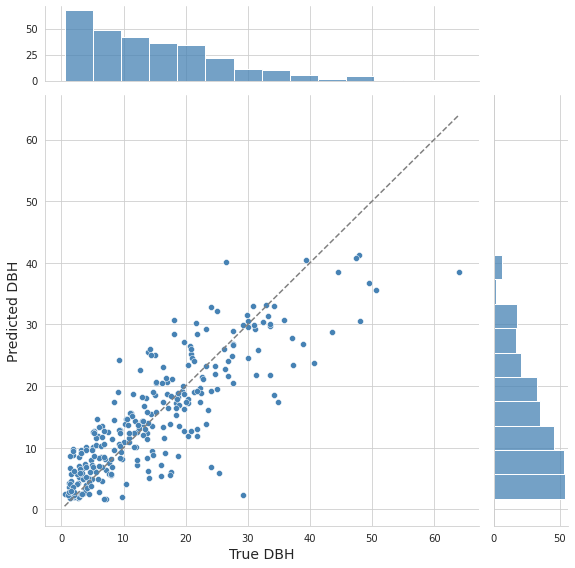

In [96]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

category = "DBH"
df = dfTrain
df = df.drop(df[df[category] == 0].index)
n_bootstrap = 100
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

model=KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the accuracy of the model
test_r2 = model.score(X_test, y_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE",test_rmse)



# plot the test_y and pred_y using jointplot with annotations
sns.set_style('whitegrid')
g = sns.jointplot(x=y_test, y=y_pred, kind='scatter', color='steelblue', height=8, ratio=5, marginal_ticks=True)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')
g.ax_joint.set_xlabel('True DBH', fontsize=14)
g.ax_joint.set_ylabel('Predicted DBH', fontsize=14)
# g.ax_joint.set_title('Predicted vs Actual Values', fontsize=16)
plt.show()

r2 value 0.6829795505220622
Confidence interval: [5.206, 7.142]
Mean RMSE: 6.17393
Standard deviation: 0.4624


(array([3., 0., 4., 3., 2., 4., 1., 2., 0., 1.]),
 array([5.44357803, 5.62257151, 5.80156499, 5.98055847, 6.15955195,
        6.33854542, 6.5175389 , 6.69653238, 6.87552586, 7.05451934,
        7.23351282]),
 <BarContainer object of 10 artists>)

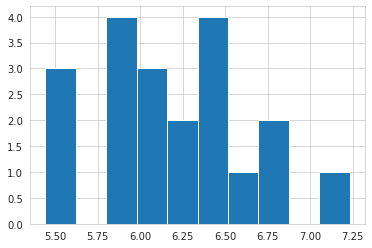

In [97]:
n_bootstrap = 20
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_r2 = []
test_RMSE = []

for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate the accuracy of the model
    test_R2 = model.score(X_test, y_test)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_r2.append(test_R2)
    test_RMSE.append(test_rmse)

# Calculate the mean
print("r2 value", np.mean(test_r2))

# Calculate the mean
mean = np.mean(test_RMSE)
# Calculate the standard deviation
std = np.std(test_RMSE)
# Confidence interval
n = len(test_RMSE)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean RMSE: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_RMSE, density=False)


# DBH Random Forest

RMSE 5.283729332549986


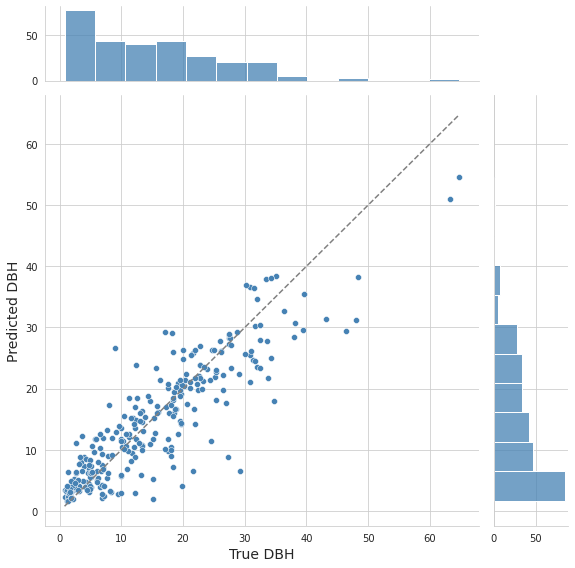

In [98]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

category = "DBH"
df = dfTrain
df = df.drop(df[df[category] == 0].index)
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the accuracy of the model
# test_r2 = model.score(X_test, y_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE",test_rmse)



# plot the test_y and pred_y using jointplot with annotations
sns.set_style('whitegrid')
g = sns.jointplot(x=y_test, y=y_pred, kind='scatter', color='steelblue', height=8, ratio=5, marginal_ticks=True)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')
g.ax_joint.set_xlabel('True DBH', fontsize=14)
g.ax_joint.set_ylabel('Predicted DBH', fontsize=14)
# g.ax_joint.set_title('Predicted vs Actual Values', fontsize=16)
plt.show()

r2 value 0.7899581895248586
Confidence interval: [4.252, 5.816]
Mean RMSE: 5.03401
Standard deviation: 0.3736


(array([2., 2., 1., 0., 5., 1., 2., 3., 1., 3.]),
 array([4.34174213, 4.47131724, 4.60089235, 4.73046745, 4.86004256,
        4.98961767, 5.11919278, 5.24876788, 5.37834299, 5.5079181 ,
        5.63749321]),
 <BarContainer object of 10 artists>)

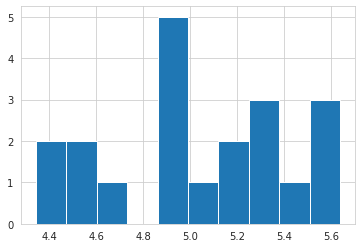

In [99]:
n_bootstrap = 20
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
test_RMSE = []

for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate the accuracy of the model
    test_r2 = model.score(X_test, y_test)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_stats.append(test_r2)
    test_RMSE.append(test_rmse)

# Calculate the mean
print("r2 value", np.mean(test_stats))

# Calculate the mean
mean = np.mean(test_RMSE)
# Calculate the standard deviation
std = np.std(test_RMSE)
# Confidence interval
n = len(test_RMSE)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean RMSE: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_RMSE, density=False)


## DBH Random Forest

RMSE 5.354627029781829


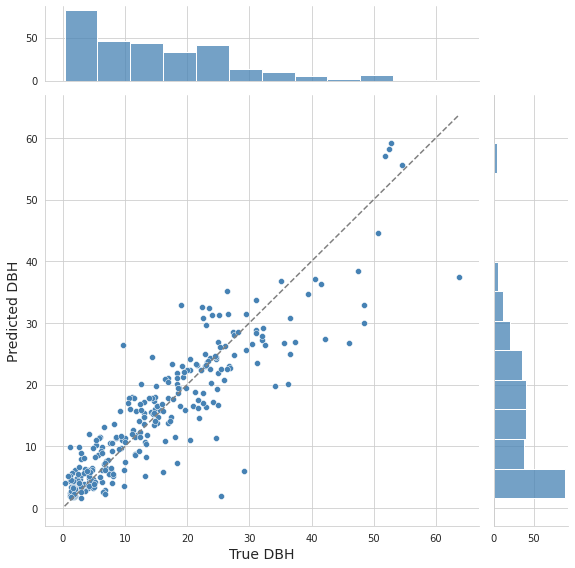

In [100]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

category = "DBH"
df = dfTrain
df = df.drop(df[df[category] == 0].index)
n_bootstrap = 100
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the accuracy of the model
# test_r2 = model.score(X_test, y_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE",test_rmse)



# plot the test_y and pred_y using jointplot with annotations
sns.set_style('whitegrid')
g = sns.jointplot(x=y_test, y=y_pred, kind='scatter', color='steelblue', height=8, ratio=5, marginal_ticks=True)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')
g.ax_joint.set_xlabel('True DBH', fontsize=14)
g.ax_joint.set_ylabel('Predicted DBH', fontsize=14)
# g.ax_joint.set_title('Predicted vs Actual Values', fontsize=16)
plt.show()

r2 value 0.7976868141297334
Confidence interval: [3.984, 5.874]
Mean RMSE: 4.92924
Standard deviation: 0.4515


(array([1., 2., 1., 4., 2., 1., 3., 3., 2., 1.]),
 array([4.06382658, 4.23197986, 4.40013315, 4.56828644, 4.73643972,
        4.90459301, 5.0727463 , 5.24089958, 5.40905287, 5.57720616,
        5.74535944]),
 <BarContainer object of 10 artists>)

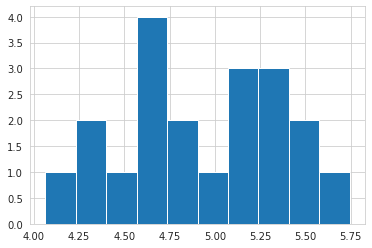

In [101]:
n_bootstrap = 20
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
test_RMSE = []

for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate the accuracy of the model
    test_r2 = model.score(X_test, y_test)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_stats.append(test_r2)
    test_RMSE.append(test_rmse)

# Calculate the mean
print("r2 value", np.mean(test_stats))

# Calculate the mean
mean = np.mean(test_RMSE)
# Calculate the standard deviation
std = np.std(test_RMSE)
# Confidence interval
n = len(test_RMSE)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean RMSE: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_RMSE, density=False)


# DBH LinearRegression


In [102]:
category = "DBH"
df = dfTrain
df = df.drop(df[df[category] == 0].index)
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2923.00,3720.00,2.15,8.83,5.59,33.14,1.38,-0.25,2.30,2.15,3.60,4.65,5.70,6.64,7.35,0.00,0.03,0.10,0.20,0.36,0.53,0.74,0.90,0.99,0.26,0.51,0.01,0.10,0.21,7.31,73.58,312.72,0.07,10000.00,797.86,4.70,65.47,71.15,76.32,209.47,52.63,67.13,78.11,173.28,0.53,2230.00,612.00,78.00,3.00,977.00,398.00,1651.00,0.31,35339.32
1423,648.00,1217.00,1.83,20.62,4.57,38.45,4.20,2.47,8.13,1.83,2.29,2.61,3.00,3.82,12.53,0.62,0.86,0.86,0.86,0.88,0.95,0.95,0.96,0.97,0.45,0.00,0.05,0.34,0.47,4.32,16.26,93.32,0.02,7400.21,1317.81,2.82,131.98,138.87,129.06,210.63,111.91,128.89,111.58,179.04,0.23,540.00,98.00,10.00,0.00,394.00,39.00,185.00,0.20,28135.22
1424,639.00,1275.00,1.75,20.26,4.62,40.23,4.35,2.19,6.74,1.75,2.18,2.36,2.78,3.84,12.36,0.63,0.84,0.84,0.84,0.86,0.95,0.95,0.97,0.97,0.42,0.00,0.05,0.36,0.50,4.62,17.37,123.19,0.08,8304.10,1634.19,2.87,143.28,146.60,138.83,205.50,115.20,129.49,112.53,174.22,0.19,518.00,108.00,13.00,0.00,399.00,47.00,166.00,0.23,28431.04
1425,7.00,53.00,9.09,19.52,14.21,223.59,5.04,0.18,0.99,9.09,9.13,10.24,11.37,19.50,19.52,0.00,0.00,0.00,0.00,0.17,0.50,0.50,0.50,0.50,0.00,0.00,0.07,0.85,0.87,2.94,1.02,4.58,0.09,10000.00,4094.38,2.88,197.18,178.55,160.91,217.09,179.00,174.67,149.00,199.00,0.05,7.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,31167.55


RMSE 4.616924679692807


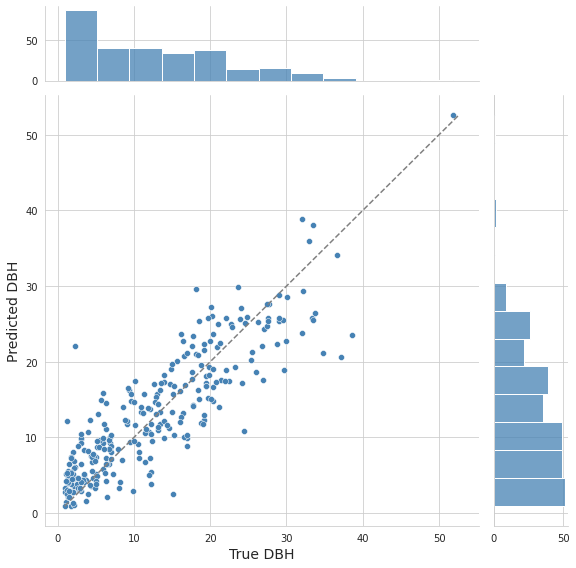

In [103]:
model=LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the accuracy of the model
test_r2 = model.score(X_test, y_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE",test_rmse)

# plot the test_y and pred_y using jointplot with annotations
sns.set_style('whitegrid')
g = sns.jointplot(x=y_test, y=y_pred, kind='scatter', color='steelblue', height=8, ratio=5, marginal_ticks=True)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')
g.ax_joint.set_xlabel('True DBH', fontsize=14)
g.ax_joint.set_ylabel('Predicted DBH', fontsize=14)
# g.ax_joint.set_title('Predicted vs Actual Values', fontsize=16)

plt.show()

RMSE 7.101458899972373


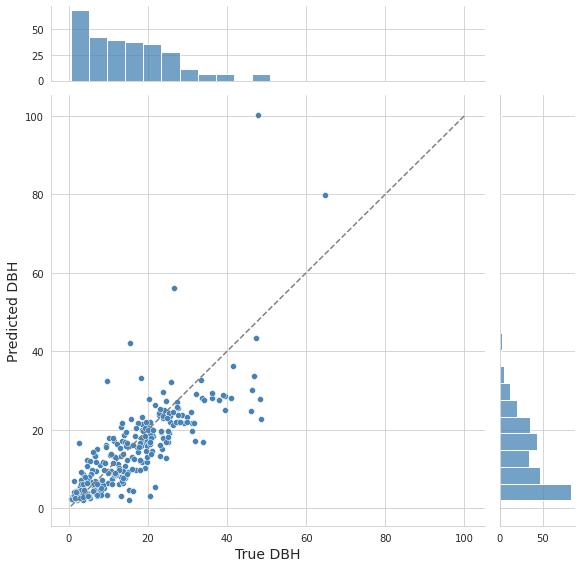

In [104]:
import seaborn as sns
import scipy.stats as stats

model=LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=True)
y_log = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2)
model.fit(X_train, y_train)
# Make predictions on the test set
y_log_pred = model.predict(X_test)
y_pred = np.exp(y_log_pred)
# Calculate the accuracy of the model
test_r2 = model.score(X_test, y_test)
test_rmse = mean_squared_error(np.exp(y_test), y_pred, squared=False)
print("RMSE", test_rmse)

# plot the test_y and pred_y using jointplot with annotations
sns.set_style('whitegrid')
g = sns.jointplot(x=np.exp(y_test), y=y_pred, kind='scatter', color='steelblue', height=8, ratio=5, marginal_ticks=True)
min_val = min(np.exp(y_test).min(), y_pred.min())
max_val = max(np.exp(y_test).max(), y_pred.max())
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')
g.ax_joint.set_xlabel('True DBH', fontsize=14)
g.ax_joint.set_ylabel('Predicted DBH', fontsize=14)
# g.ax_joint.set_title('Predicted vs Actual Values', fontsize=16)

plt.show()



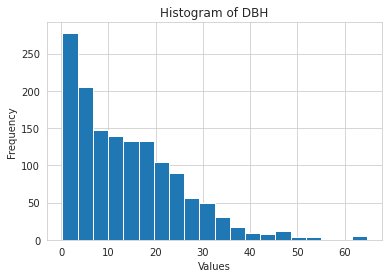

In [105]:
# select the column you want to plot
column_data = df['DBH']

# plot the histogram
plt.hist(column_data, bins=20)  # adjust the number of bins as desired
plt.title('Histogram of {}'.format('DBH'))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [106]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_r2 = []
test_RMSE = []

for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    test_r2 = clf.score(X_test, y_test)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_stats.append(test_r2)
    test_RMSE.append(test_rmse)
    

print(np.mean(test_RMSE))

5.685267389147143


Confidence interval: [0.716, 0.873]
Mean: 0.79452
Standard deviation: 0.0377


(array([1., 1., 0., 3., 4., 1., 6., 2., 2., 1.]),
 array([0.70441099, 0.72089729, 0.73738359, 0.7538699 , 0.7703562 ,
        0.78684251, 0.80332881, 0.81981511, 0.83630142, 0.85278772,
        0.86927403]),
 <BarContainer object of 10 artists>)

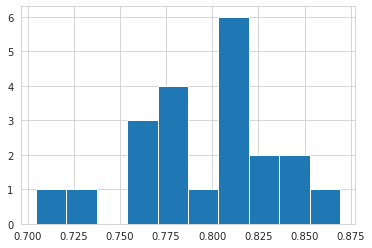

In [107]:
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=False)

Confidence interval: [nan, nan]
Mean: 5.68527
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([5.18526739, 5.28526739, 5.38526739, 5.48526739, 5.58526739,
        5.68526739, 5.78526739, 5.88526739, 5.98526739, 6.08526739,
        6.18526739]),
 <BarContainer object of 10 artists>)

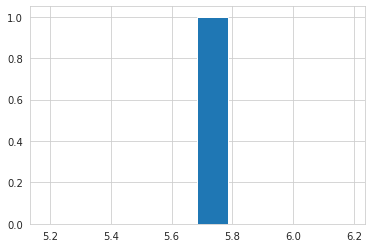

In [108]:
# Calculate the mean
mean = np.mean(test_RMSE)
# Calculate the standard deviation
std = np.std(test_RMSE)
# Confidence interval
n = len(test_RMSE)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_RMSE, density=False)

In [109]:
# # Define the new value to test
# sample_mean = np.mean(test_stats)
# sample_std = np.std(test_stats, ddof=1)
# sample_size = len(test_stats)

# # Calculate the t-statistic and p-value
# t_stat = (sample_mean - null_accuracy) / (sample_std)
# p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# # Print the results
# print("t-statistic:", t_stat)
# print("p-value:", p_value)

# Deciduous/coniferous (Functional)

In [110]:
category = "Functional"
df = dfTrain
n_bootstrap = 2
null_accuracy = 0.88797
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=5)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2923.00,3720.00,2.15,8.83,5.59,33.14,1.38,-0.25,2.30,2.15,3.60,4.65,5.70,6.64,7.35,0.00,0.03,0.10,0.20,0.36,0.53,0.74,0.90,0.99,0.26,0.51,0.01,0.10,0.21,7.31,73.58,312.72,0.07,10000.00,797.86,4.70,65.47,71.15,76.32,209.47,52.63,67.13,78.11,173.28,0.53,2230.00,612.00,78.00,3.00,977.00,398.00,1651.00,0.31,35339.32
1423,648.00,1217.00,1.83,20.62,4.57,38.45,4.20,2.47,8.13,1.83,2.29,2.61,3.00,3.82,12.53,0.62,0.86,0.86,0.86,0.88,0.95,0.95,0.96,0.97,0.45,0.00,0.05,0.34,0.47,4.32,16.26,93.32,0.02,7400.21,1317.81,2.82,131.98,138.87,129.06,210.63,111.91,128.89,111.58,179.04,0.23,540.00,98.00,10.00,0.00,394.00,39.00,185.00,0.20,28135.22
1424,639.00,1275.00,1.75,20.26,4.62,40.23,4.35,2.19,6.74,1.75,2.18,2.36,2.78,3.84,12.36,0.63,0.84,0.84,0.84,0.86,0.95,0.95,0.97,0.97,0.42,0.00,0.05,0.36,0.50,4.62,17.37,123.19,0.08,8304.10,1634.19,2.87,143.28,146.60,138.83,205.50,115.20,129.49,112.53,174.22,0.19,518.00,108.00,13.00,0.00,399.00,47.00,166.00,0.23,28431.04
1425,7.00,53.00,9.09,19.52,14.21,223.59,5.04,0.18,0.99,9.09,9.13,10.24,11.37,19.50,19.52,0.00,0.00,0.00,0.00,0.17,0.50,0.50,0.50,0.50,0.00,0.00,0.07,0.85,0.87,2.94,1.02,4.58,0.09,10000.00,4094.38,2.88,197.18,178.55,160.91,217.09,179.00,174.67,149.00,199.00,0.05,7.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,31167.55


length: 1427
Functional
BD    1342
CE      85
dtype: int64


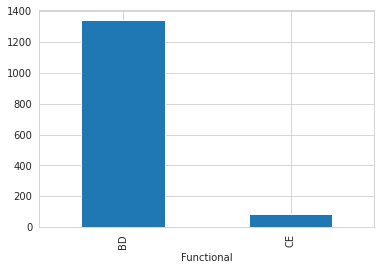

In [111]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [112]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [0.821, 1.088]
Mean: 0.95455
Standard deviation: 0.0105


(array([238.33333333,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 238.33333333]),
 array([0.94405594, 0.94615385, 0.94825175, 0.95034965, 0.95244755,
        0.95454545, 0.95664336, 0.95874126, 0.96083916, 0.96293706,
        0.96503497]),
 <BarContainer object of 10 artists>)

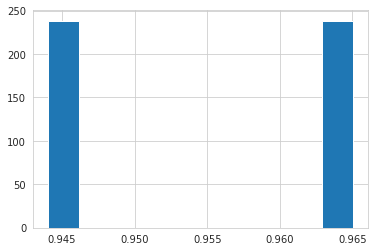

In [113]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [114]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 4.48790774524166
p-value: 0.13957217130100127


0.9596844872918493 Train Accuracy
0.9335664335664335 Test Accuracy
              precision    recall  f1-score   support

          BD       0.94      0.99      0.97       265
          CE       0.67      0.19      0.30        21

    accuracy                           0.93       286
   macro avg       0.80      0.59      0.63       286
weighted avg       0.92      0.93      0.92       286



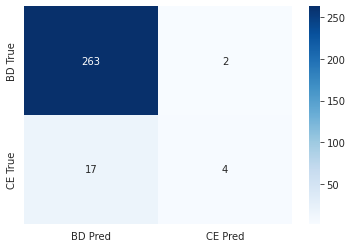

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

Confusion matrix:
[[1325   17]
 [  62   23]]
              precision    recall  f1-score   support

          BD       0.96      0.99      0.97      1342
          CE       0.57      0.27      0.37        85

    accuracy                           0.94      1427
   macro avg       0.77      0.63      0.67      1427
weighted avg       0.93      0.94      0.94      1427



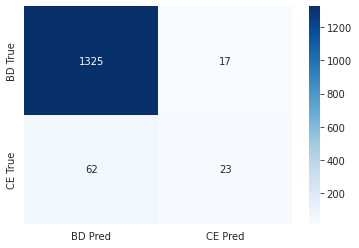

In [116]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

# Good/Fair/Poor (Condition)

In [117]:
category = "Condition"
df = dfTrain
n_bootstrap = 2
null_hypotheis = 0.5585
clf = DecisionTreeClassifier()
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2923.00,3720.00,2.15,8.83,5.59,33.14,1.38,-0.25,2.30,2.15,3.60,4.65,5.70,6.64,7.35,0.00,0.03,0.10,0.20,0.36,0.53,0.74,0.90,0.99,0.26,0.51,0.01,0.10,0.21,7.31,73.58,312.72,0.07,10000.00,797.86,4.70,65.47,71.15,76.32,209.47,52.63,67.13,78.11,173.28,0.53,2230.00,612.00,78.00,3.00,977.00,398.00,1651.00,0.31,35339.32
1423,648.00,1217.00,1.83,20.62,4.57,38.45,4.20,2.47,8.13,1.83,2.29,2.61,3.00,3.82,12.53,0.62,0.86,0.86,0.86,0.88,0.95,0.95,0.96,0.97,0.45,0.00,0.05,0.34,0.47,4.32,16.26,93.32,0.02,7400.21,1317.81,2.82,131.98,138.87,129.06,210.63,111.91,128.89,111.58,179.04,0.23,540.00,98.00,10.00,0.00,394.00,39.00,185.00,0.20,28135.22
1424,639.00,1275.00,1.75,20.26,4.62,40.23,4.35,2.19,6.74,1.75,2.18,2.36,2.78,3.84,12.36,0.63,0.84,0.84,0.84,0.86,0.95,0.95,0.97,0.97,0.42,0.00,0.05,0.36,0.50,4.62,17.37,123.19,0.08,8304.10,1634.19,2.87,143.28,146.60,138.83,205.50,115.20,129.49,112.53,174.22,0.19,518.00,108.00,13.00,0.00,399.00,47.00,166.00,0.23,28431.04
1425,7.00,53.00,9.09,19.52,14.21,223.59,5.04,0.18,0.99,9.09,9.13,10.24,11.37,19.50,19.52,0.00,0.00,0.00,0.00,0.17,0.50,0.50,0.50,0.50,0.00,0.00,0.07,0.85,0.87,2.94,1.02,4.58,0.09,10000.00,4094.38,2.88,197.18,178.55,160.91,217.09,179.00,174.67,149.00,199.00,0.05,7.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,31167.55


length: 1427
Condition
Fair    1002
Good     359
Poor      66
dtype: int64


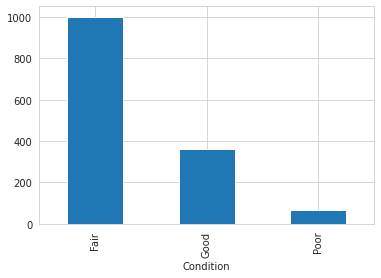

In [118]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [119]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [0.463, 0.863]
Mean: 0.66259
Standard deviation: 0.0157


(array([158.88888889,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 158.88888889]),
 array([0.64685315, 0.65      , 0.65314685, 0.65629371, 0.65944056,
        0.66258741, 0.66573427, 0.66888112, 0.67202797, 0.67517483,
        0.67832168]),
 <BarContainer object of 10 artists>)

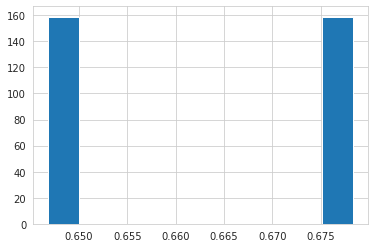

In [120]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [121]:
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -10.128820665189286
p-value: 0.06264928320394231


1.0 Train Accuracy
0.6293706293706294 Test Accuracy
              precision    recall  f1-score   support

        Fair       0.73      0.75      0.74       191
        Good       0.49      0.44      0.46        80
        Poor       0.06      0.07      0.06        15

    accuracy                           0.63       286
   macro avg       0.43      0.42      0.42       286
weighted avg       0.62      0.63      0.63       286



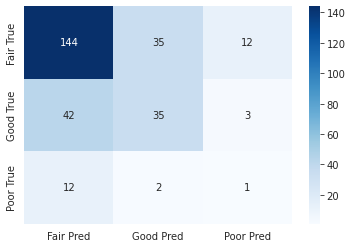

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')
label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

Confusion matrix:
[[763 190  49]
 [186 150  23]
 [ 45  11  10]]
              precision    recall  f1-score   support

        Fair       0.77      0.76      0.76      1002
        Good       0.43      0.42      0.42       359
        Poor       0.12      0.15      0.14        66

    accuracy                           0.65      1427
   macro avg       0.44      0.44      0.44      1427
weighted avg       0.65      0.65      0.65      1427



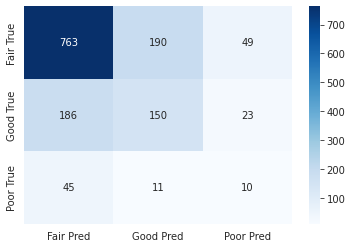

In [123]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

# Deciduous/coniferous/**Hedge** (Functional)

In [124]:
category = "Functional"
df = dfTrainHedge
n_bootstrap = 2
# calculated as (1342/1656)^2+(229/1656)^2+(85/1656)^2 = 0.6785
null_accuracy = 0.6772
clf = DecisionTreeClassifier()
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1656
Functional
BD       1342
HEDGE     229
CE         85
dtype: int64


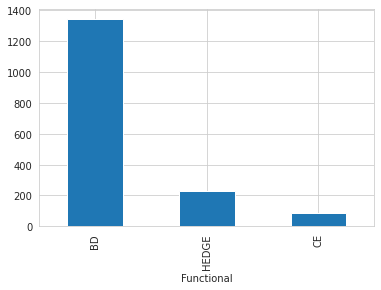

In [125]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(df))
print(counts)

In [126]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [0.773, 0.965]
Mean: 0.86898
Standard deviation: 0.0075


(array([332.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 332.]),
 array([0.86144578, 0.86295181, 0.86445783, 0.86596386, 0.86746988,
        0.8689759 , 0.87048193, 0.87198795, 0.87349398, 0.875     ,
        0.87650602]),
 <BarContainer object of 10 artists>)

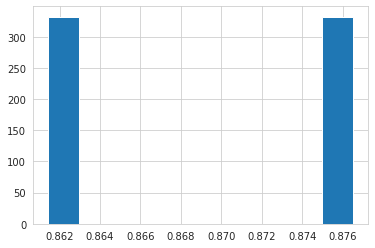

In [127]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [128]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 18.008482366174043
p-value: 0.03531483806453643


1.0 Train Accuracy
0.8463855421686747 Test Accuracy
              precision    recall  f1-score   support

          BD       0.90      0.92      0.91       265
          CE       0.40      0.38      0.39        16
       HEDGE       0.68      0.59      0.63        51

    accuracy                           0.85       332
   macro avg       0.66      0.63      0.64       332
weighted avg       0.84      0.85      0.84       332



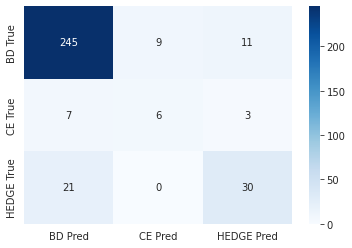

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [130]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.85542169 0.86102719 0.86706949 0.85800604 0.87311178]
Cross-validation scores: [0.85542169 0.86102719 0.86706949 0.85800604 0.87311178]
Mean accuracy: 0.863


DecisionTreeClassifier()

Confusion matrix:
[[1236   43   63]
 [  42   33   10]
 [  61    9  159]]
              precision    recall  f1-score   support

          BD       0.92      0.92      0.92      1342
          CE       0.39      0.39      0.39        85
       HEDGE       0.69      0.69      0.69       229

    accuracy                           0.86      1656
   macro avg       0.67      0.67      0.67      1656
weighted avg       0.86      0.86      0.86      1656



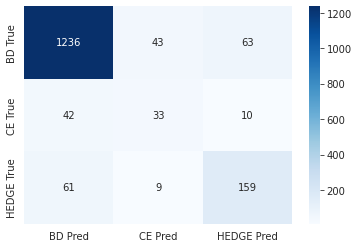

In [131]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

# 6 Families and **Hedge** (Family)(DecisionTreeClassifier)(57.49%)

---



In [132]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 2
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split=3)
# clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=5)
# clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8, min_samples_split=3)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


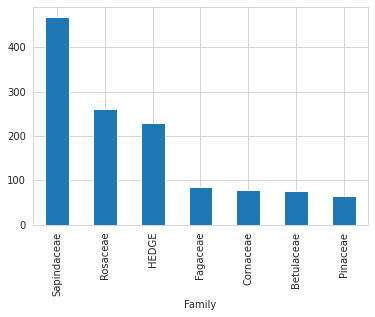

In [133]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [134]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [0.564, 0.614]
Mean: 0.58929
Standard deviation: 0.0020


(array([1260.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1260.]),
 array([0.58730159, 0.58769841, 0.58809524, 0.58849206, 0.58888889,
        0.58928571, 0.58968254, 0.59007937, 0.59047619, 0.59087302,
        0.59126984]),
 <BarContainer object of 10 artists>)

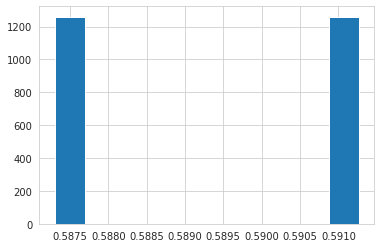

In [135]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [136]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 128.72002139092473
p-value: 0.004945671686382228


0.76441351888668 Train Accuracy
0.5952380952380952 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.56      0.28      0.37        18
   Cornaceae       0.17      0.12      0.14        16
    Fagaceae       0.38      0.30      0.33        10
       HEDGE       0.75      0.67      0.71        45
    Pinaceae       0.67      0.50      0.57        16
    Rosaceae       0.44      0.62      0.52        58
 Sapindaceae       0.73      0.74      0.74        89

    accuracy                           0.60       252
   macro avg       0.53      0.46      0.48       252
weighted avg       0.60      0.60      0.59       252



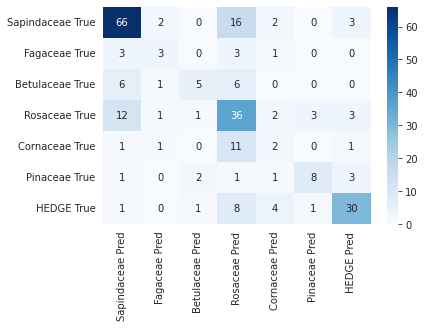

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [138]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.55952381 0.54761905 0.58333333 0.56573705 0.58167331]
Cross-validation scores: [0.55952381 0.54761905 0.58333333 0.56573705 0.58167331]
Mean accuracy: 0.568


DecisionTreeClassifier(max_depth=8, min_samples_split=3)

Confusion matrix:
[[ 20   0   3   4   4  12  32]
 [  0  13   5   7   0  31  22]
 [  0   8  30   1   2  17  27]
 [  4  11   8 166   6  25   9]
 [  1   0   5   6  29  11  12]
 [  8   8  12  12  12 137  71]
 [ 20   7  29   8   8  70 325]]
              precision    recall  f1-score   support

  Betulaceae       0.38      0.27      0.31        75
   Cornaceae       0.28      0.17      0.21        78
    Fagaceae       0.33      0.35      0.34        85
       HEDGE       0.81      0.72      0.77       229
    Pinaceae       0.48      0.45      0.46        64
    Rosaceae       0.45      0.53      0.49       260
 Sapindaceae       0.65      0.70      0.67       467

    accuracy                           0.57      1258
   macro avg       0.48      0.46      0.46      1258
weighted avg       0.57      0.57      0.57      1258



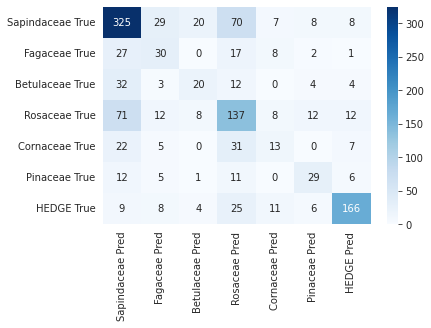

In [139]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

# 6 Families and **Hedge** (Family)(RidgeClassifier)(64.43%)

In [140]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 2
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = RidgeClassifier(alpha=1.0)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


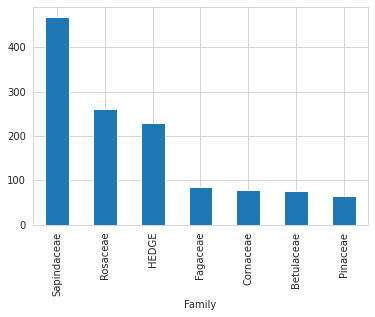

In [141]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [142]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [0.328, 0.933]
Mean: 0.63095
Standard deviation: 0.0238


(array([105.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 105.]),
 array([0.60714286, 0.61190476, 0.61666667, 0.62142857, 0.62619048,
        0.63095238, 0.63571429, 0.64047619, 0.6452381 , 0.65      ,
        0.6547619 ]),
 <BarContainer object of 10 artists>)

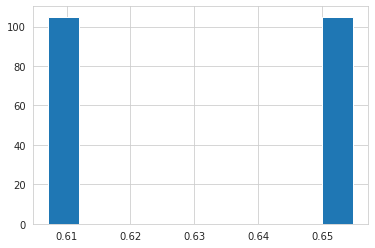

In [143]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [144]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 11.964105316320133
p-value: 0.053087416594877604


0.6749502982107356 Train Accuracy
0.6309523809523809 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.25      0.14      0.18         7
   Cornaceae       0.50      0.05      0.09        21
    Fagaceae       0.86      0.32      0.46        19
       HEDGE       0.62      0.88      0.73        33
    Pinaceae       0.90      0.56      0.69        16
    Rosaceae       0.50      0.64      0.56        55
 Sapindaceae       0.70      0.77      0.73       101

    accuracy                           0.63       252
   macro avg       0.62      0.48      0.49       252
weighted avg       0.64      0.63      0.60       252



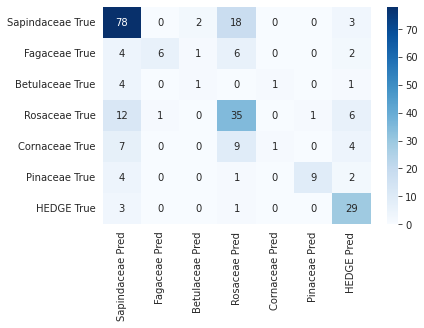

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [146]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.58730159 0.63492063 0.63492063 0.66932271 0.66932271]
Cross-validation scores: [0.58730159 0.63492063 0.63492063 0.66932271 0.66932271]
Mean accuracy: 0.639


RidgeClassifier()

Confusion matrix:
[[  1   2   1   8   0  19  44]
 [  0   4   0  14   0  35  25]
 [  0   3  24   2   0  18  38]
 [  0   2   1 208   0   7  11]
 [  0   0   1   7  26   9  21]
 [  0   1   2  20   3 171  63]
 [  1   3   1  25   3  64 370]]
              precision    recall  f1-score   support

  Betulaceae       0.50      0.01      0.03        75
   Cornaceae       0.27      0.05      0.09        78
    Fagaceae       0.80      0.28      0.42        85
       HEDGE       0.73      0.91      0.81       229
    Pinaceae       0.81      0.41      0.54        64
    Rosaceae       0.53      0.66      0.59       260
 Sapindaceae       0.65      0.79      0.71       467

    accuracy                           0.64      1258
   macro avg       0.61      0.44      0.45      1258
weighted avg       0.62      0.64      0.60      1258



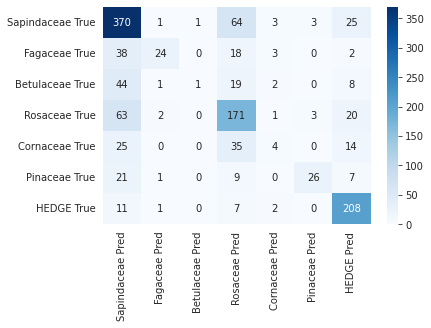

In [147]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [148]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 100
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


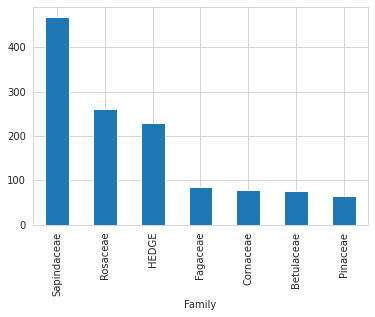

In [149]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [150]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [0.610, 0.707]
Mean: 0.65865
Standard deviation: 0.0245


(array([ 1.4,  4.9,  1.4, 13.3, 14.7, 16.8, 14. ,  2.1,  0.7,  0.7]),
 array([0.59126984, 0.60555556, 0.61984127, 0.63412698, 0.6484127 ,
        0.66269841, 0.67698413, 0.69126984, 0.70555556, 0.71984127,
        0.73412698]),
 <BarContainer object of 10 artists>)

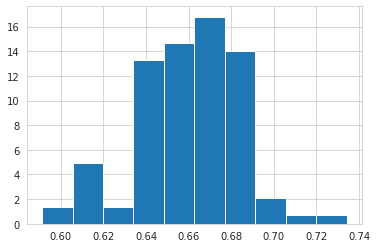

In [151]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [152]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 17.494290879598832
p-value: 4.7288654274523724e-32


0.6928429423459245 Train Accuracy
0.6785714285714286 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.75      0.32      0.44        19
   Cornaceae       0.33      0.33      0.33        15
    Fagaceae       0.71      0.29      0.42        17
       HEDGE       0.83      0.90      0.86        39
    Pinaceae       0.89      0.50      0.64        16
    Rosaceae       0.48      0.73      0.58        44
 Sapindaceae       0.77      0.78      0.78       102

    accuracy                           0.68       252
   macro avg       0.68      0.55      0.58       252
weighted avg       0.70      0.68      0.67       252



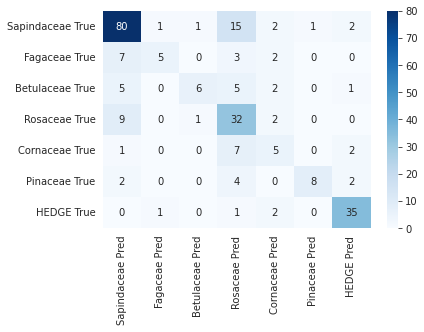

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [154]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.61111111 0.67063492 0.67857143 0.65737052 0.69322709]
Cross-validation scores: [0.61111111 0.67063492 0.67857143 0.65737052 0.69322709]
Mean accuracy: 0.662


LinearDiscriminantAnalysis(solver='lsqr')

Confusion matrix:
[[ 25   7   1   4   0  14  24]
 [  1  30   0   4   1  33   9]
 [  1   8  31   0   0  19  26]
 [  2  16   2 194   2   7   6]
 [  0   2   0   6  34   9  13]
 [  7  17   2   5   7 172  50]
 [ 11  26   5   8   5  65 347]]
              precision    recall  f1-score   support

  Betulaceae       0.53      0.33      0.41        75
   Cornaceae       0.28      0.38      0.33        78
    Fagaceae       0.76      0.36      0.49        85
       HEDGE       0.88      0.85      0.86       229
    Pinaceae       0.69      0.53      0.60        64
    Rosaceae       0.54      0.66      0.59       260
 Sapindaceae       0.73      0.74      0.74       467

    accuracy                           0.66      1258
   macro avg       0.63      0.55      0.57      1258
weighted avg       0.68      0.66      0.66      1258



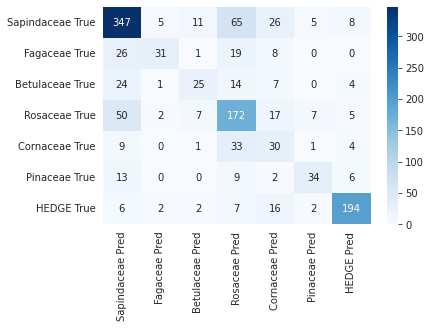

In [155]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [156]:
# LDA contribution test: 
coef = clf.coef_
# for i, col in enumerate (X_train.columns):
#     print (f"{col}: {coef[0, i]:.3f}")

# 6 Families and **Hedge** (Family)
LinearDiscriminantAnalysis
svd:66.81%
lsqr: 67.25% 


In [157]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 100
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


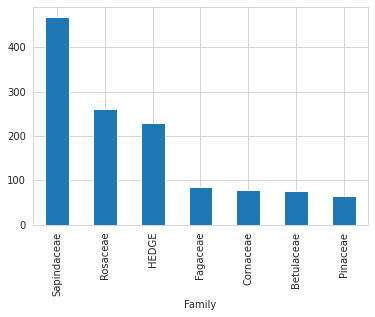

In [158]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [159]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [0.605, 0.717]
Mean: 0.66119
Standard deviation: 0.0283


(array([ 2.3625,  7.0875, 10.2375, 14.9625, 10.2375, 14.175 ,  8.6625,
         5.5125,  1.575 ,  3.9375]),
 array([0.6031746 , 0.61587302, 0.62857143, 0.64126984, 0.65396825,
        0.66666667, 0.67936508, 0.69206349, 0.7047619 , 0.71746032,
        0.73015873]),
 <BarContainer object of 10 artists>)

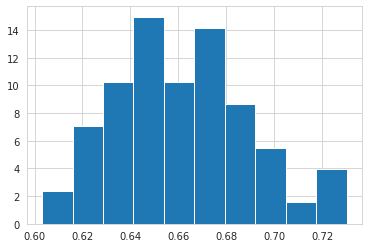

In [160]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [161]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 15.233448992216406
p-value: 1.0642791859962249e-27


0.7087475149105368 Train Accuracy
0.623015873015873 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.30      0.21      0.25        14
   Cornaceae       0.20      0.19      0.19        16
    Fagaceae       0.88      0.62      0.73        24
       HEDGE       0.89      0.82      0.86        40
    Pinaceae       0.50      0.56      0.53         9
    Rosaceae       0.49      0.63      0.55        59
 Sapindaceae       0.70      0.68      0.69        90

    accuracy                           0.62       252
   macro avg       0.57      0.53      0.54       252
weighted avg       0.64      0.62      0.63       252



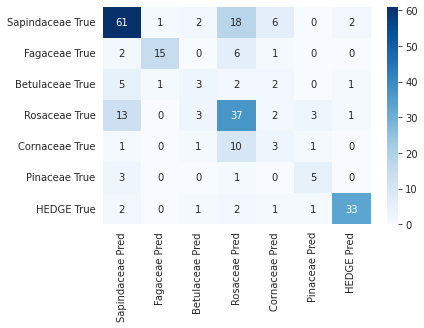

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [163]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.61111111 0.67063492 0.67857143 0.65737052 0.69322709]
Cross-validation scores: [0.61111111 0.67063492 0.67857143 0.65737052 0.69322709]
Mean accuracy: 0.662


LinearDiscriminantAnalysis(solver='lsqr')

Confusion matrix:
[[ 25   7   1   4   0  14  24]
 [  1  30   0   4   1  33   9]
 [  1   8  31   0   0  19  26]
 [  2  16   2 194   2   7   6]
 [  0   2   0   6  34   9  13]
 [  7  17   2   5   7 172  50]
 [ 11  26   5   8   5  65 347]]
              precision    recall  f1-score   support

  Betulaceae       0.53      0.33      0.41        75
   Cornaceae       0.28      0.38      0.33        78
    Fagaceae       0.76      0.36      0.49        85
       HEDGE       0.88      0.85      0.86       229
    Pinaceae       0.69      0.53      0.60        64
    Rosaceae       0.54      0.66      0.59       260
 Sapindaceae       0.73      0.74      0.74       467

    accuracy                           0.66      1258
   macro avg       0.63      0.55      0.57      1258
weighted avg       0.68      0.66      0.66      1258



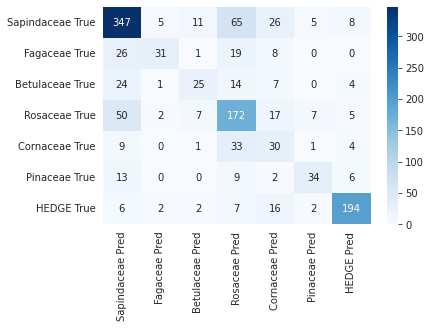

In [164]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [165]:
# LDA contribution test: 
coef = clf.coef_
# for i, col in enumerate (X_train.columns):
#     print (f"{col}: {coef[0, i]:.3f}")

# 6 Families and **Hedge** (Family)
LogisticRegression

In [166]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 2
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = LogisticRegression()
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


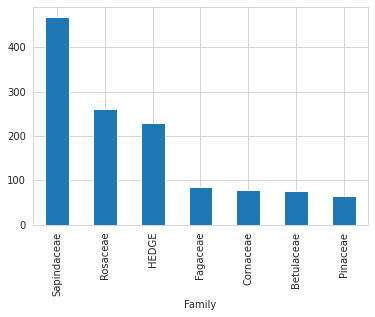

In [167]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [168]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Confidence interval: [0.470, 0.621]
Mean: 0.54563
Standard deviation: 0.0060


(array([420.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 420.]),
 array([0.53968254, 0.54087302, 0.54206349, 0.54325397, 0.54444444,
        0.54563492, 0.5468254 , 0.54801587, 0.54920635, 0.55039683,
        0.5515873 ]),
 <BarContainer object of 10 artists>)

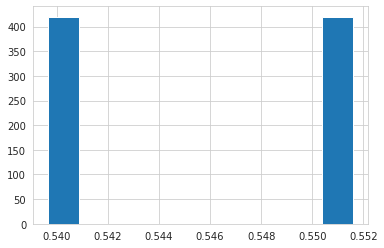

In [169]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [170]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 37.721224068273195
p-value: 0.016873012827360225


0.5685884691848907 Train Accuracy
0.5833333333333334 Test Accuracy


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

              precision    recall  f1-score   support

  Betulaceae       0.00      0.00      0.00        12
   Cornaceae       0.00      0.00      0.00        18
    Fagaceae       1.00      0.25      0.40        16
       HEDGE       0.72      0.86      0.78        56
    Pinaceae       0.00      0.00      0.00        14
    Rosaceae       0.51      0.60      0.55        52
 Sapindaceae       0.55      0.76      0.64        84

    accuracy                           0.58       252
   macro avg       0.40      0.35      0.34       252
weighted avg       0.51      0.58      0.52       252



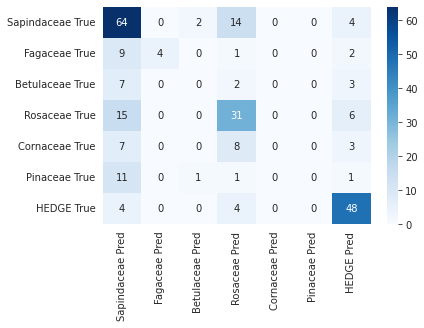

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [172]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.51984127 0.5515873  0.58730159 0.61354582 0.58565737]
Cross-validation scores: [0.51984127 0.5515873  0.58730159 0.61354582 0.58565737]
Mean accuracy: 0.572


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Confusion matrix:
[[ 10   0   0  14   0  20  31]
 [  0   0   0  20   0  46  12]
 [  1   0  23  15   1   8  37]
 [  0   0   0 204   0  10  15]
 [  1   0   1  13   1   3  45]
 [  0   0   1  43   0 128  88]
 [  3   0   4  41   1  65 353]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Betulaceae       0.67      0.13      0.22        75
   Cornaceae       0.00      0.00      0.00        78
    Fagaceae       0.79      0.27      0.40        85
       HEDGE       0.58      0.89      0.70       229
    Pinaceae       0.33      0.02      0.03        64
    Rosaceae       0.46      0.49      0.47       260
 Sapindaceae       0.61      0.76      0.67       467

    accuracy                           0.57      1258
   macro avg       0.49      0.37      0.36      1258
weighted avg       0.54      0.57      0.52      1258



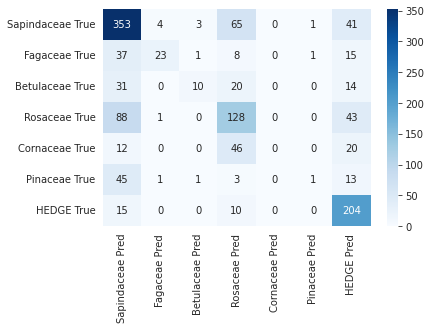

In [173]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [174]:
# LDA contribution test: 
coef = clf.coef_
# for i, col in enumerate (X_train.columns):
#     print (f"{col}: {coef[0, i]:.3f}")

# 6 Families and **Hedge** (Family)
RandomForestClassifier
Default 68.24%

In [175]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 2
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = RandomForestClassifier(n_estimators=200, criterion='gini')
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


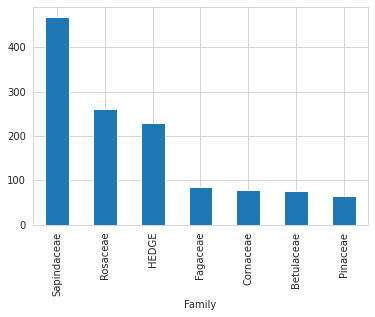

In [176]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [177]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [0.547, 0.799]
Mean: 0.67262
Standard deviation: 0.0099


(array([252.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 252.]),
 array([0.66269841, 0.66468254, 0.66666667, 0.66865079, 0.67063492,
        0.67261905, 0.67460317, 0.6765873 , 0.67857143, 0.68055556,
        0.68253968]),
 <BarContainer object of 10 artists>)

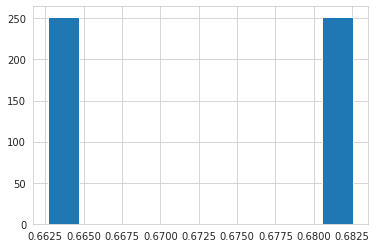

In [178]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [179]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 31.683701240151795
p-value: 0.02008630565383669


1.0 Train Accuracy
0.6785714285714286 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       1.00      0.13      0.24        15
   Cornaceae       0.56      0.26      0.36        19
    Fagaceae       0.75      0.35      0.48        17
       HEDGE       0.78      0.96      0.86        49
    Pinaceae       0.45      0.45      0.45        11
    Rosaceae       0.41      0.69      0.52        36
 Sapindaceae       0.80      0.77      0.79       105

    accuracy                           0.68       252
   macro avg       0.68      0.52      0.53       252
weighted avg       0.72      0.68      0.66       252



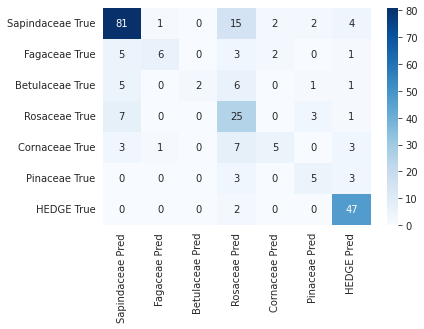

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [181]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.65873016 0.69047619 0.70634921 0.70916335 0.68525896]
Cross-validation scores: [0.65873016 0.69047619 0.70634921 0.70916335 0.68525896]
Mean accuracy: 0.690


RandomForestClassifier(n_estimators=200)

Confusion matrix:
[[ 22   2   1   4   1  14  31]
 [  1  25   0  12   0  26  14]
 [  0   4  30   2   0  13  36]
 [  1   3   0 213   0   9   3]
 [  0   1   1   9  30  10  13]
 [  2   9   1  18   7 170  53]
 [  1   3   7  18   1  59 378]]
              precision    recall  f1-score   support

  Betulaceae       0.81      0.29      0.43        75
   Cornaceae       0.53      0.32      0.40        78
    Fagaceae       0.75      0.35      0.48        85
       HEDGE       0.77      0.93      0.84       229
    Pinaceae       0.77      0.47      0.58        64
    Rosaceae       0.56      0.65      0.61       260
 Sapindaceae       0.72      0.81      0.76       467

    accuracy                           0.69      1258
   macro avg       0.70      0.55      0.59      1258
weighted avg       0.69      0.69      0.67      1258



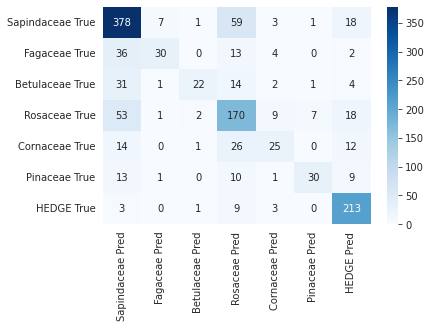

In [182]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [183]:
# Get the feature importance scores
importance_scores = clf.feature_importances_
feature_names = df.iloc[:, 15:].columns[:-1]
# Print the feature importance scores
for feature_name, importance_score in zip(feature_names, importance_scores):
    print(f'{feature_name}: {importance_score:.4f}')

all: 0.0103
min: 0.0126
max: 0.0120
avg: 0.0206
qav: 0.0160
std: 0.0185
ske: 0.0220
kur: 0.0146
hom: 0.0119
p10: 0.0114
p25: 0.0165
p50: 0.0158
p75: 0.0170
p90: 0.0177
b10: 0.0193
b20: 0.0123
b30: 0.0138
b40: 0.0119
b50: 0.0121
b60: 0.0114
b70: 0.0109
b80: 0.0123
b90: 0.0132
d00: 0.0112
d01: 0.0172
d02: 0.0102
cov_gap: 0.0228
dns_gap: 0.0184
height: 0.0267
crownArea: 0.0234
SArea: 0.0192
Min_Slope: 0.0330
Max_Slope: 0.0140
Avg_Slope: 0.0080
Z_Mean_FirstReturn: 0.0292
2018_R: 0.0170
2018_G: 0.0173
2018_B: 0.0160
2018_N: 0.0220
2020_R: 0.0173
2020_G: 0.0204
2020_B: 0.0176
2020_N: 0.0221
averageNDVI: 0.0355
1re: 0.0298
2re: 0.0118
3re: 0.0257
4re: 0.0199
FirstofManyre: 0.0135
LastofManyre: 0.0369
Lastre: 0.0255
NonFirstoverFirst: 0.0140


# 6 Families and **Hedge** (Family)(MLPClassifier)(27%)(BAD)

In [184]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


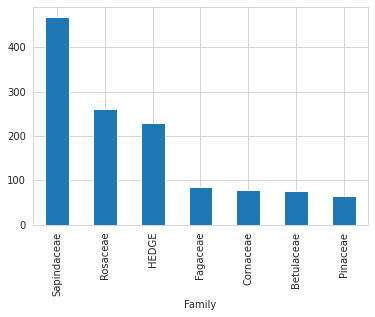

In [185]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [186]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [nan, nan]
Mean: 0.30159
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([-0.1984127, -0.0984127,  0.0015873,  0.1015873,  0.2015873,
         0.3015873,  0.4015873,  0.5015873,  0.6015873,  0.7015873,
         0.8015873]),
 <BarContainer object of 10 artists>)

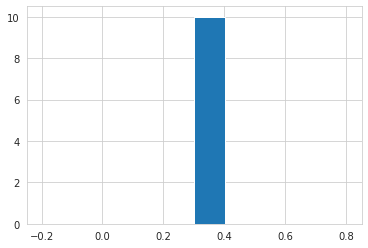

In [187]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [188]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.3996023856858847 Train Accuracy
0.32142857142857145 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.12      0.12      0.12        17
   Cornaceae       0.00      0.00      0.00        16
    Fagaceae       0.67      0.22      0.33        18
       HEDGE       0.50      0.50      0.50        54
    Pinaceae       0.00      0.00      0.00         6
    Rosaceae       0.23      0.20      0.22        54
 Sapindaceae       0.34      0.43      0.38        87

    accuracy                           0.32       252
   macro avg       0.27      0.21      0.22       252
weighted avg       0.33      0.32      0.32       252



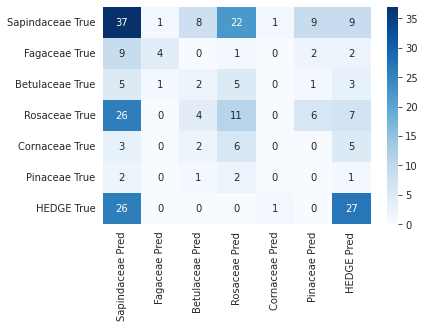

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [190]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.40079365 0.3968254  0.44444444 0.48605578 0.4940239 ]
Cross-validation scores: [0.40079365 0.3968254  0.44444444 0.48605578 0.4940239 ]
Mean accuracy: 0.444


MLPClassifier()

Confusion matrix:
[[  7  10   6   2   4  35  11]
 [  2  14   3   4   8  46   1]
 [  4   4  24   4   7  27  15]
 [  0  22  42  64  12  65  24]
 [  2   1   5   3   7  24  22]
 [ 14  33   8   3  14 155  33]
 [ 14  34  30   6  26 158 199]]
              precision    recall  f1-score   support

  Betulaceae       0.16      0.09      0.12        75
   Cornaceae       0.12      0.18      0.14        78
    Fagaceae       0.20      0.28      0.24        85
       HEDGE       0.74      0.28      0.41       229
    Pinaceae       0.09      0.11      0.10        64
    Rosaceae       0.30      0.60      0.40       260
 Sapindaceae       0.65      0.43      0.52       467

    accuracy                           0.37      1258
   macro avg       0.33      0.28      0.27      1258
weighted avg       0.48      0.37      0.39      1258



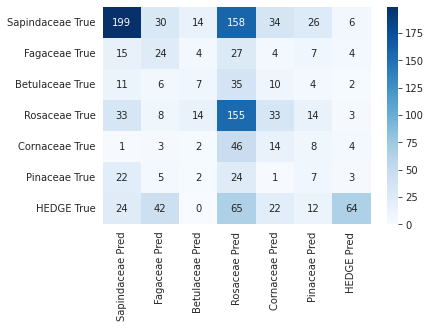

In [191]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

# 6 Families and **Hedge** (Family)(KNeighborsClassifier)(55.14%)

In [192]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


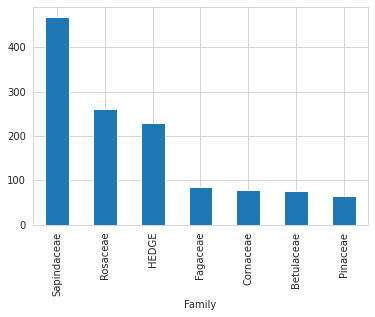

In [193]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [194]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [nan, nan]
Mean: 0.51190
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.01190476, 0.11190476, 0.21190476, 0.31190476, 0.41190476,
        0.51190476, 0.61190476, 0.71190476, 0.81190476, 0.91190476,
        1.01190476]),
 <BarContainer object of 10 artists>)

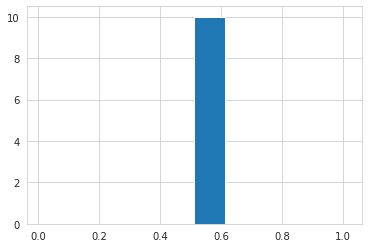

In [195]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [196]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.6749502982107356 Train Accuracy
0.5238095238095238 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.25      0.21      0.23        14
   Cornaceae       0.24      0.20      0.22        20
    Fagaceae       0.44      0.40      0.42        10
       HEDGE       0.80      0.77      0.78        47
    Pinaceae       0.25      0.08      0.12        12
    Rosaceae       0.37      0.49      0.42        59
 Sapindaceae       0.63      0.61      0.62        90

    accuracy                           0.52       252
   macro avg       0.43      0.40      0.40       252
weighted avg       0.52      0.52      0.52       252



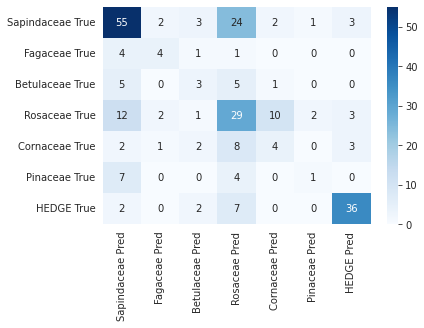

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [198]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.5        0.47619048 0.49603175 0.54581673 0.56573705]
Cross-validation scores: [0.5        0.47619048 0.49603175 0.54581673 0.56573705]
Mean accuracy: 0.517


KNeighborsClassifier()

Confusion matrix:
[[ 26   4   1   6   1  15  22]
 [  5  15   4  10   3  29  12]
 [  2   8  28   1   3  16  27]
 [  8   4   1 177   1  27  11]
 [  1   3   4   5   6  11  34]
 [ 13  23   9  27   7 117  64]
 [ 22  13  23  21  20  87 281]]
              precision    recall  f1-score   support

  Betulaceae       0.34      0.35      0.34        75
   Cornaceae       0.21      0.19      0.20        78
    Fagaceae       0.40      0.33      0.36        85
       HEDGE       0.72      0.77      0.74       229
    Pinaceae       0.15      0.09      0.11        64
    Rosaceae       0.39      0.45      0.42       260
 Sapindaceae       0.62      0.60      0.61       467

    accuracy                           0.52      1258
   macro avg       0.40      0.40      0.40      1258
weighted avg       0.51      0.52      0.51      1258



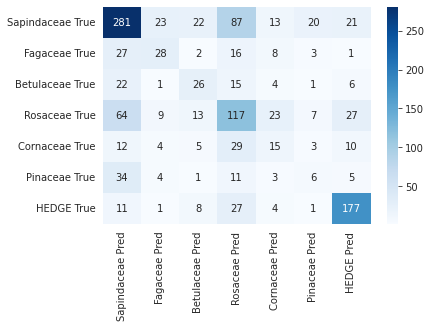

In [199]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

# 6 Families and **Hedge** (Family)(LinearDiscriminantAnalysis)(58%)(BAD)

In [200]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=False, tol=0.0001)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


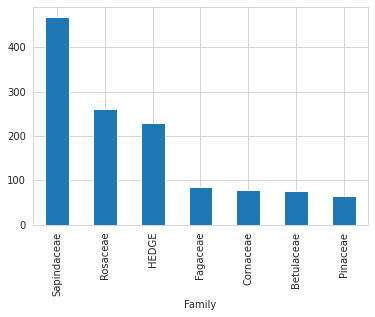

In [201]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [202]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Confidence interval: [nan, nan]
Mean: 0.63889
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.13888889, 0.23888889, 0.33888889, 0.43888889, 0.53888889,
        0.63888889, 0.73888889, 0.83888889, 0.93888889, 1.03888889,
        1.13888889]),
 <BarContainer object of 10 artists>)

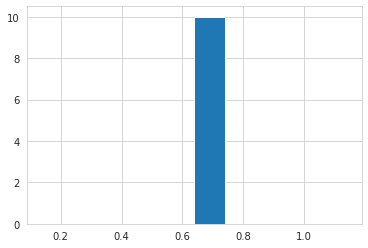

In [203]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [204]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8061630218687873 Train Accuracy
0.5436507936507936 Test Accuracy


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Betulaceae       0.00      0.00      0.00        22
   Cornaceae       1.00      0.06      0.11        18
    Fagaceae       0.75      0.14      0.23        22
       HEDGE       0.68      0.88      0.77        41
    Pinaceae       0.00      0.00      0.00        11
    Rosaceae       0.32      0.74      0.44        42
 Sapindaceae       0.69      0.69      0.69        96

    accuracy                           0.54       252
   macro avg       0.49      0.36      0.32       252
weighted avg       0.56      0.54      0.49       252



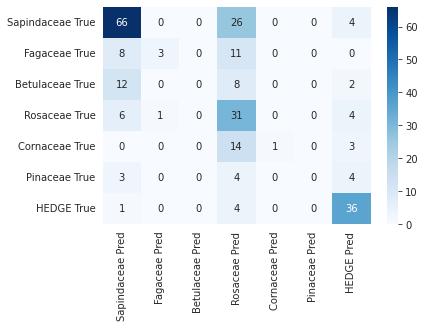

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [206]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[0.53968254 0.57936508 0.53571429 0.62549801 0.58167331]
Cross-validation scores: [0.53968254 0.57936508 0.53571429 0.62549801 0.58167331]
Mean accuracy: 0.572


/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Confusion matrix:
[[  2   0   0  10   0  18  45]
 [  0   4   0  17   0  53   4]
 [  0   0  17   7   0  23  38]
 [  0   0   0 186   0  37   6]
 [  0   0   0   8   0  20  36]
 [  0   2   0  29   0 183  46]
 [  0   1   4  26   0 108 328]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Betulaceae       1.00      0.03      0.05        75
   Cornaceae       0.57      0.05      0.09        78
    Fagaceae       0.81      0.20      0.32        85
       HEDGE       0.66      0.81      0.73       229
    Pinaceae       0.00      0.00      0.00        64
    Rosaceae       0.41      0.70      0.52       260
 Sapindaceae       0.65      0.70      0.68       467

    accuracy                           0.57      1258
   macro avg       0.59      0.36      0.34      1258
weighted avg       0.60      0.57      0.52      1258



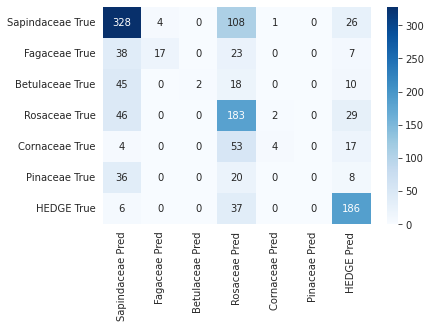

In [207]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

# 6 Families and **Hedge** (Family)(SVC)(38%) (BAD)

In [208]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = SVC()
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


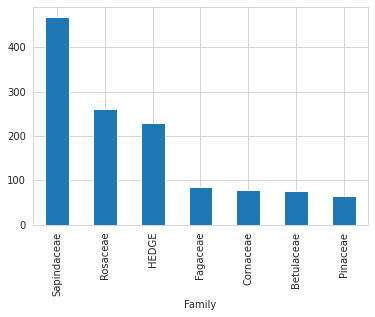

In [209]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [210]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [nan, nan]
Mean: 0.50000
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

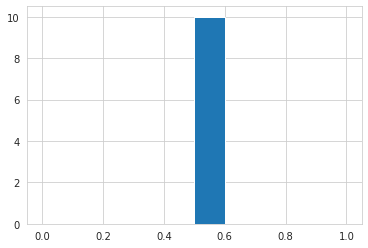

In [211]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [212]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.525844930417495 Train Accuracy
0.5793650793650794 Test Accuracy


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Betulaceae       0.00      0.00      0.00        11
   Cornaceae       0.00      0.00      0.00        16
    Fagaceae       0.00      0.00      0.00        18
       HEDGE       0.69      0.82      0.75        44
    Pinaceae       0.00      0.00      0.00        10
    Rosaceae       0.40      0.65      0.50        49
 Sapindaceae       0.65      0.75      0.70       104

    accuracy                           0.58       252
   macro avg       0.25      0.32      0.28       252
weighted avg       0.47      0.58      0.51       252



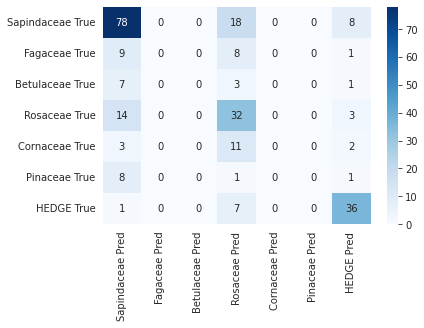

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [214]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.49206349 0.53571429 0.52380952 0.60159363 0.53784861]
Cross-validation scores: [0.49206349 0.53571429 0.52380952 0.60159363 0.53784861]
Mean accuracy: 0.538


SVC()

Confusion matrix:
[[  0   0   0   7   0  21  47]
 [  0   0   0  16   0  53   9]
 [  0   0  14   2   0  27  42]
 [  0   0   0 191   0  28  10]
 [  0   0   0   9   0  12  43]
 [  0   0   0  32   0 135  93]
 [  0   0   3  31   0  96 337]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Betulaceae       0.00      0.00      0.00        75
   Cornaceae       0.00      0.00      0.00        78
    Fagaceae       0.82      0.16      0.27        85
       HEDGE       0.66      0.83      0.74       229
    Pinaceae       0.00      0.00      0.00        64
    Rosaceae       0.36      0.52      0.43       260
 Sapindaceae       0.58      0.72      0.64       467

    accuracy                           0.54      1258
   macro avg       0.35      0.32      0.30      1258
weighted avg       0.47      0.54      0.48      1258



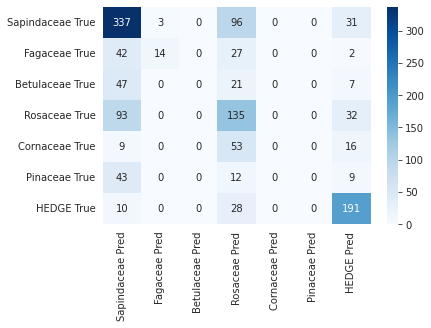

In [215]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

# 6 Families and **Hedge** (Family)(Oversample)
DecisionTreeClassifier

In [216]:
from imblearn.over_sampling import SMOTE
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split=3)
# clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=5)
# clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8, min_samples_split=3)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


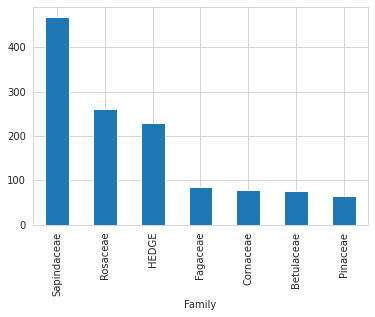

In [217]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [218]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
sm = SMOTE(random_state=42)
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    clf.fit(X_train_res, y_train_res)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [nan, nan]
Mean: 0.58730
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.08730159, 0.18730159, 0.28730159, 0.38730159, 0.48730159,
        0.58730159, 0.68730159, 0.78730159, 0.88730159, 0.98730159,
        1.08730159]),
 <BarContainer object of 10 artists>)

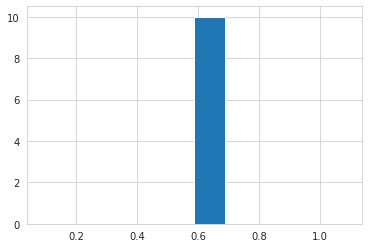

In [219]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [220]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.7236580516898609 Train Accuracy
0.4642857142857143 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.11      0.25      0.15        12
   Cornaceae       0.27      0.50      0.35        20
    Fagaceae       0.47      0.45      0.46        20
       HEDGE       0.70      0.62      0.66        45
    Pinaceae       0.47      0.69      0.56        13
    Rosaceae       0.32      0.42      0.36        53
 Sapindaceae       0.86      0.40      0.55        89

    accuracy                           0.46       252
   macro avg       0.46      0.48      0.44       252
weighted avg       0.58      0.46      0.49       252

[0.00000000e+00 1.22764693e-03 1.78963641e-04 1.37284016e-02
 0.00000000e+00 3.39145670e-03 1.05737360e-02 2.03470182e-02
 1.25255400e-03 4.86962444e-03 8.23285395e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.22630796e-02
 1.03998906e-02 8.59352849e-04 1.05471863e-02 2.35295233e-03
 4.58667779e-03 0.00000000e+00 

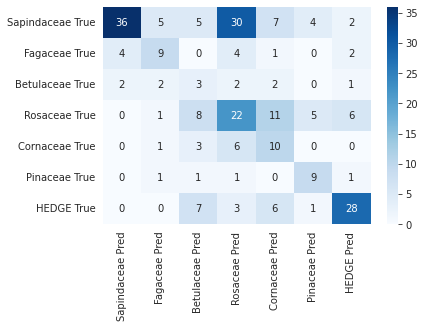

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
clf.fit(X_train_res, y_train_res)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)
importances = clf.feature_importances_
print(importances)

In [222]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.58333333 0.52380952 0.59126984 0.56972112 0.58167331]
Cross-validation scores: [0.58333333 0.52380952 0.59126984 0.56972112 0.58167331]
Mean accuracy: 0.570


DecisionTreeClassifier(max_depth=8, min_samples_split=3)

Confusion matrix:
[[ 21   1   2   4   4  12  31]
 [  0  15   4   7   0  31  21]
 [  2   6  30   1   2  16  28]
 [  3  12   7 161   6  28  12]
 [  1   1   7   4  28  11  12]
 [  8   9  10  14  16 134  69]
 [ 16   7  23   9   8  72 332]]
              precision    recall  f1-score   support

  Betulaceae       0.41      0.28      0.33        75
   Cornaceae       0.29      0.19      0.23        78
    Fagaceae       0.36      0.35      0.36        85
       HEDGE       0.81      0.70      0.75       229
    Pinaceae       0.44      0.44      0.44        64
    Rosaceae       0.44      0.52      0.48       260
 Sapindaceae       0.66      0.71      0.68       467

    accuracy                           0.57      1258
   macro avg       0.49      0.46      0.47      1258
weighted avg       0.57      0.57      0.57      1258



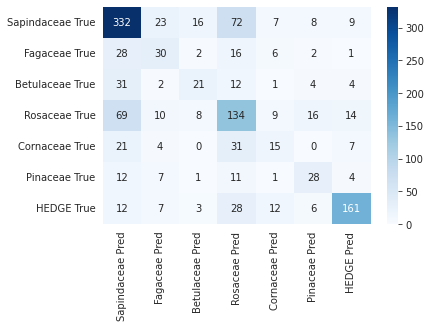

In [223]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

# 6 Families and **Hedge** (Family)(Oversample)(SVC)
(Insignificant,BAD)

In [224]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
# clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=5)
# clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8, min_samples_split=3)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


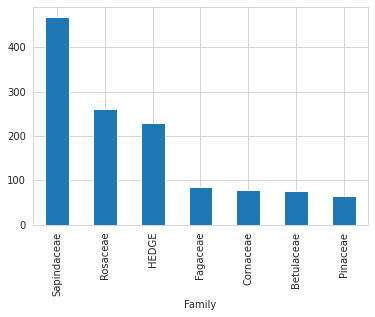

In [225]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [226]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
sm = SMOTE(random_state=42)
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    clf.fit(X_train_res, y_train_res)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [nan, nan]
Mean: 0.45238
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([-0.04761905,  0.05238095,  0.15238095,  0.25238095,  0.35238095,
         0.45238095,  0.55238095,  0.65238095,  0.75238095,  0.85238095,
         0.95238095]),
 <BarContainer object of 10 artists>)

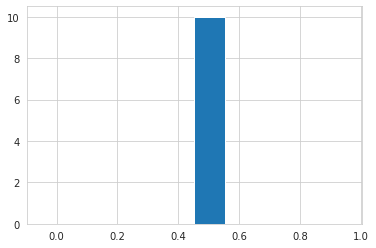

In [227]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [228]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.4433399602385686 Train Accuracy
0.4444444444444444 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.44      0.39      0.41        18
   Cornaceae       0.17      0.39      0.24        18
    Fagaceae       0.26      0.71      0.38         7
       HEDGE       0.70      0.79      0.75        48
    Pinaceae       0.18      0.36      0.24        11
    Rosaceae       0.33      0.42      0.37        50
 Sapindaceae       0.81      0.30      0.44       100

    accuracy                           0.44       252
   macro avg       0.41      0.48      0.40       252
weighted avg       0.58      0.44      0.46       252



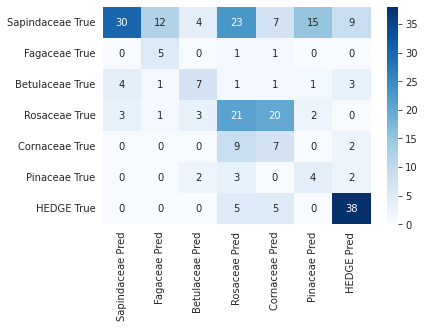

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
clf.fit(X_train_res, y_train_res)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [230]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.49206349 0.53571429 0.52380952 0.60159363 0.53784861]
Cross-validation scores: [0.49206349 0.53571429 0.52380952 0.60159363 0.53784861]
Mean accuracy: 0.538


SVC()

Confusion matrix:
[[  0   0   0   7   0  21  47]
 [  0   0   0  16   0  53   9]
 [  0   0  14   2   0  27  42]
 [  0   0   0 191   0  28  10]
 [  0   0   0   9   0  12  43]
 [  0   0   0  32   0 135  93]
 [  0   0   3  31   0  96 337]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Betulaceae       0.00      0.00      0.00        75
   Cornaceae       0.00      0.00      0.00        78
    Fagaceae       0.82      0.16      0.27        85
       HEDGE       0.66      0.83      0.74       229
    Pinaceae       0.00      0.00      0.00        64
    Rosaceae       0.36      0.52      0.43       260
 Sapindaceae       0.58      0.72      0.64       467

    accuracy                           0.54      1258
   macro avg       0.35      0.32      0.30      1258
weighted avg       0.47      0.54      0.48      1258



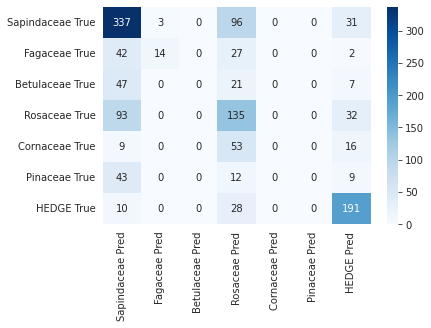

In [231]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

# 6 Families and **Hedge** (Family)(Oversample)(RandomForestClassifier)
RandomForestClassifier
200 estimators

In [232]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 2
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = RandomForestClassifier(n_estimators=100, criterion='gini')
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


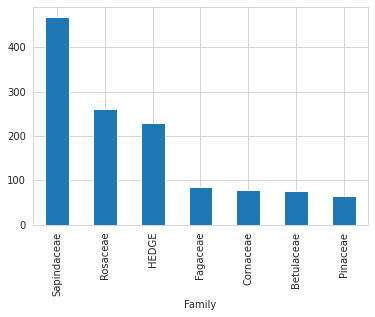

In [233]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [234]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
sm = SMOTE(random_state=42)
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    clf.fit(X_train_res, y_train_res)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [0.441, 0.845]
Mean: 0.64286
Standard deviation: 0.0159


(array([157.5,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
        157.5]),
 array([0.62698413, 0.63015873, 0.63333333, 0.63650794, 0.63968254,
        0.64285714, 0.64603175, 0.64920635, 0.65238095, 0.65555556,
        0.65873016]),
 <BarContainer object of 10 artists>)

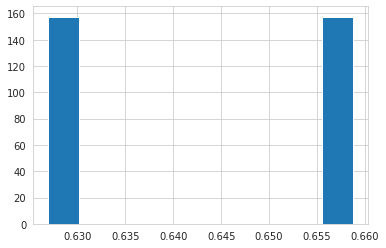

In [235]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [236]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 18.47648806037013
p-value: 0.03442208538975822


1.0 Train Accuracy
0.6825396825396826 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.54      0.58      0.56        12
   Cornaceae       0.35      1.00      0.52         8
    Fagaceae       0.71      0.33      0.45        15
       HEDGE       0.86      0.93      0.89        54
    Pinaceae       0.56      0.36      0.43        14
    Rosaceae       0.50      0.62      0.55        45
 Sapindaceae       0.80      0.66      0.73       104

    accuracy                           0.68       252
   macro avg       0.62      0.64      0.59       252
weighted avg       0.72      0.68      0.68       252



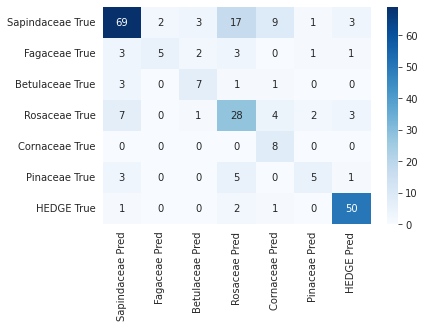

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
clf.fit(X_train_res, y_train_res)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [238]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.65873016 0.67857143 0.67063492 0.70119522 0.68924303]
Cross-validation scores: [0.65873016 0.67857143 0.67063492 0.70119522 0.68924303]
Mean accuracy: 0.680


RandomForestClassifier()

Confusion matrix:
[[ 19   1   1   5   1  17  31]
 [  1  24   0  10   0  30  13]
 [  0   2  33   2   0  15  33]
 [  2   4   0 213   0   6   4]
 [  1   0   0   9  30  12  12]
 [  1   9   2  17   5 175  51]
 [  2   4   8  16   1  57 379]]
              precision    recall  f1-score   support

  Betulaceae       0.73      0.25      0.38        75
   Cornaceae       0.55      0.31      0.39        78
    Fagaceae       0.75      0.39      0.51        85
       HEDGE       0.78      0.93      0.85       229
    Pinaceae       0.81      0.47      0.59        64
    Rosaceae       0.56      0.67      0.61       260
 Sapindaceae       0.72      0.81      0.77       467

    accuracy                           0.69      1258
   macro avg       0.70      0.55      0.59      1258
weighted avg       0.70      0.69      0.68      1258



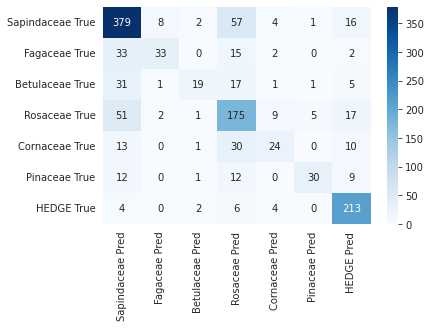

In [239]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [240]:
# Get the feature importance scores
importance_scores = clf.feature_importances_
feature_names = df.iloc[:, 15:].columns[:-1]
# Print the feature importance scores
for feature_name, importance_score in zip(feature_names, importance_scores):
    print(f'{feature_name}: {importance_score:.4f}')

all: 0.0126
min: 0.0142
max: 0.0134
avg: 0.0212
qav: 0.0196
std: 0.0150
ske: 0.0252
kur: 0.0147
hom: 0.0119
p10: 0.0121
p25: 0.0157
p50: 0.0124
p75: 0.0211
p90: 0.0162
b10: 0.0153
b20: 0.0126
b30: 0.0141
b40: 0.0122
b50: 0.0103
b60: 0.0112
b70: 0.0109
b80: 0.0133
b90: 0.0138
d00: 0.0113
d01: 0.0196
d02: 0.0108
cov_gap: 0.0220
dns_gap: 0.0166
height: 0.0287
crownArea: 0.0172
SArea: 0.0183
Min_Slope: 0.0286
Max_Slope: 0.0149
Avg_Slope: 0.0089
Z_Mean_FirstReturn: 0.0349
2018_R: 0.0234
2018_G: 0.0143
2018_B: 0.0159
2018_N: 0.0251
2020_R: 0.0167
2020_G: 0.0177
2020_B: 0.0168
2020_N: 0.0216
averageNDVI: 0.0356
1re: 0.0306
2re: 0.0118
3re: 0.0262
4re: 0.0176
FirstofManyre: 0.0179
LastofManyre: 0.0330
Lastre: 0.0217
NonFirstoverFirst: 0.0140


## Apply the results to predict population

# Functional and **Hedge** (Functional)(Oversample)(RandomForestClassifier)


In [241]:
category = "Functional"
df = dfTrainHedge
n_bootstrap = 2
null_accuracy = 0.6785
clf = RandomForestClassifier(n_estimators=100, criterion='gini')
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1656
Functional
BD       1342
HEDGE     229
CE         85
dtype: int64


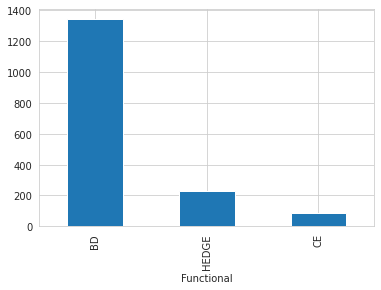

In [242]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(df))
print(counts)

In [243]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
sm = SMOTE(random_state=42)
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    clf.fit(X_train_res, y_train_res)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [0.877, 0.954]
Mean: 0.91566
Standard deviation: 0.0030


(array([830.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 830.]),
 array([0.9126506 , 0.91325301, 0.91385542, 0.91445783, 0.91506024,
        0.91566265, 0.91626506, 0.91686747, 0.91746988, 0.91807229,
        0.9186747 ]),
 <BarContainer object of 10 artists>)

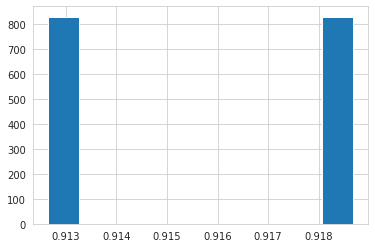

In [244]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [245]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 55.67617373706672
p-value: 0.0114331011909639


1.0 Train Accuracy
0.9126506024096386 Test Accuracy
              precision    recall  f1-score   support

          BD       0.96      0.93      0.95       274
          CE       0.62      0.57      0.59        14
       HEDGE       0.75      0.89      0.81        44

    accuracy                           0.91       332
   macro avg       0.77      0.80      0.78       332
weighted avg       0.92      0.91      0.91       332



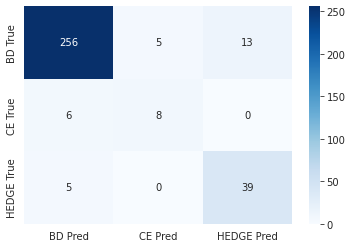

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
clf.fit(X_train_res, y_train_res)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [247]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.9126506  0.90332326 0.93655589 0.92145015 0.9244713 ]
Cross-validation scores: [0.9126506  0.90332326 0.93655589 0.92145015 0.9244713 ]
Mean accuracy: 0.920


RandomForestClassifier()

Confusion matrix:
[[1317    6   19]
 [  52   28    5]
 [  55    0  174]]
              precision    recall  f1-score   support

          BD       0.92      0.98      0.95      1342
          CE       0.82      0.33      0.47        85
       HEDGE       0.88      0.76      0.81       229

    accuracy                           0.92      1656
   macro avg       0.88      0.69      0.75      1656
weighted avg       0.91      0.92      0.91      1656



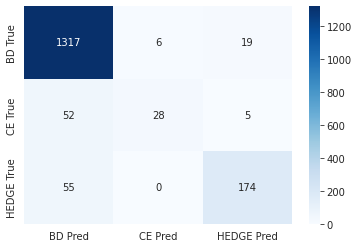

In [248]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [249]:
# Get the feature importance scores
importance_scores = clf.feature_importances_
feature_names = df.iloc[:, 15:].columns[:-1]
# Print the feature importance scores
for feature_name, importance_score in zip(feature_names, importance_scores):
    print(f'{feature_name}: {importance_score:.4f}')

all: 0.0094
min: 0.0126
max: 0.0113
avg: 0.0258
qav: 0.0159
std: 0.0130
ske: 0.0185
kur: 0.0156
hom: 0.0107
p10: 0.0116
p25: 0.0166
p50: 0.0090
p75: 0.0078
p90: 0.0132
b10: 0.0151
b20: 0.0134
b30: 0.0134
b40: 0.0118
b50: 0.0083
b60: 0.0089
b70: 0.0127
b80: 0.0133
b90: 0.0079
d00: 0.0070
d01: 0.0281
d02: 0.0084
cov_gap: 0.0070
dns_gap: 0.0189
height: 0.0390
crownArea: 0.0132
SArea: 0.0130
Min_Slope: 0.0325
Max_Slope: 0.0154
Avg_Slope: 0.0107
Z_Mean_FirstReturn: 0.0481
2018_R: 0.0095
2018_G: 0.0223
2018_B: 0.0110
2018_N: 0.0236
2020_R: 0.0241
2020_G: 0.0192
2020_B: 0.0124
2020_N: 0.0172
averageNDVI: 0.0496
1re: 0.0283
2re: 0.0096
3re: 0.0292
4re: 0.0098
FirstofManyre: 0.0034
LastofManyre: 0.0563
Lastre: 0.0152
NonFirstoverFirst: 0.0121


## Apply the results to predict population

# 6 Families and **Hedge** (Family)(Oversample)(LDA)


In [250]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


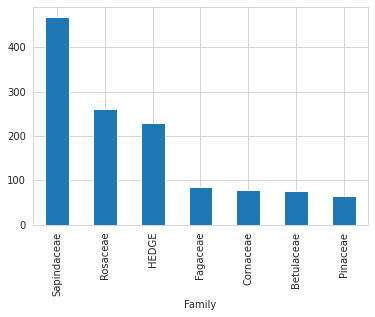

In [251]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [252]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
sm = SMOTE(random_state=42)
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    clf.fit(X_train_res, y_train_res)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [nan, nan]
Mean: 0.55556
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.05555556, 0.15555556, 0.25555556, 0.35555556, 0.45555556,
        0.55555556, 0.65555556, 0.75555556, 0.85555556, 0.95555556,
        1.05555556]),
 <BarContainer object of 10 artists>)

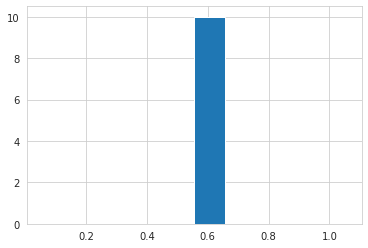

In [253]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [254]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.6481113320079522 Train Accuracy
0.5833333333333334 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.30      0.41      0.35        17
   Cornaceae       0.07      0.50      0.12         6
    Fagaceae       0.15      0.12      0.14        16
       HEDGE       0.93      0.86      0.89        49
    Pinaceae       0.64      0.64      0.64        11
    Rosaceae       0.59      0.52      0.55        65
 Sapindaceae       0.91      0.59      0.72        88

    accuracy                           0.58       252
   macro avg       0.51      0.52      0.49       252
weighted avg       0.71      0.58      0.63       252



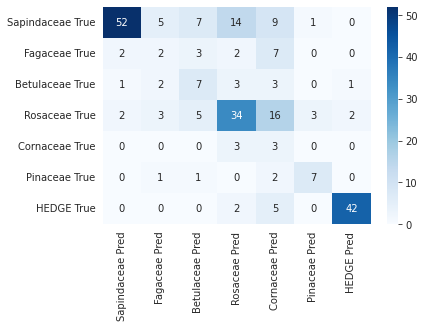

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
clf.fit(X_train_res, y_train_res)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [256]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.61111111 0.67063492 0.67857143 0.65737052 0.69322709]
Cross-validation scores: [0.61111111 0.67063492 0.67857143 0.65737052 0.69322709]
Mean accuracy: 0.662


LinearDiscriminantAnalysis(solver='lsqr')

Confusion matrix:
[[ 25   7   1   4   0  14  24]
 [  1  30   0   4   1  33   9]
 [  1   8  31   0   0  19  26]
 [  2  16   2 194   2   7   6]
 [  0   2   0   6  34   9  13]
 [  7  17   2   5   7 172  50]
 [ 11  26   5   8   5  65 347]]
              precision    recall  f1-score   support

  Betulaceae       0.53      0.33      0.41        75
   Cornaceae       0.28      0.38      0.33        78
    Fagaceae       0.76      0.36      0.49        85
       HEDGE       0.88      0.85      0.86       229
    Pinaceae       0.69      0.53      0.60        64
    Rosaceae       0.54      0.66      0.59       260
 Sapindaceae       0.73      0.74      0.74       467

    accuracy                           0.66      1258
   macro avg       0.63      0.55      0.57      1258
weighted avg       0.68      0.66      0.66      1258



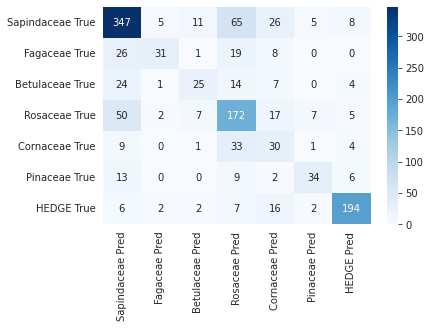

In [257]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [258]:
# # Get the feature importance scores
# importance_scores = clf.feature_importances_
# feature_names = df.iloc[:, 15:].columns[:-1]
# # Print the feature importance scores
# for feature_name, importance_score in zip(feature_names, importance_scores):
#     print(f'{feature_name}: {importance_score:.4f}')

# **Selected Model**

# Coniferous/Deciduous and **Hedge** (Functional)(Oversample)(RandomForestClassifier)
Null: 0.6785
Result: 


In [259]:
category = "Functional"
df = dfTrainHedge
n_bootstrap = 1
null_accuracy = 0.6785
clf = RandomForestClassifier(n_estimators=100, criterion='gini')
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1656
Functional
BD       1342
HEDGE     229
CE         85
dtype: int64


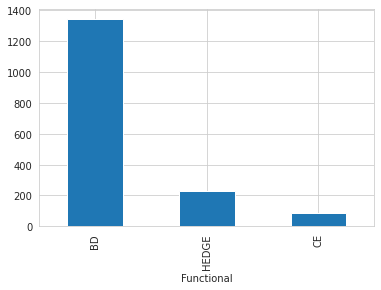

In [260]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(df))
print(counts)

In [261]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
sm = SMOTE(random_state=42)
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    clf.fit(X_train_res, y_train_res)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [nan, nan]
Mean: 0.89157
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.39156627, 0.49156627, 0.59156627, 0.69156627, 0.79156627,
        0.89156627, 0.99156627, 1.09156627, 1.19156627, 1.29156627,
        1.39156627]),
 <BarContainer object of 10 artists>)

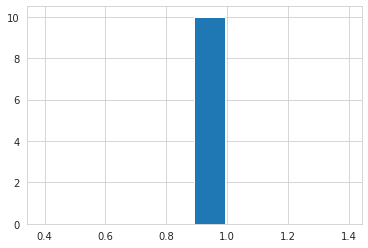

In [262]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [263]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.0 Train Accuracy
0.927710843373494 Test Accuracy
              precision    recall  f1-score   support

          BD       0.95      0.97      0.96       274
          CE       0.64      0.47      0.55        19
       HEDGE       0.87      0.87      0.87        39

    accuracy                           0.93       332
   macro avg       0.82      0.77      0.79       332
weighted avg       0.92      0.93      0.92       332



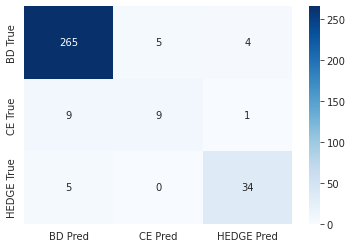

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
clf.fit(X_train_res, y_train_res)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [265]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.91566265 0.89425982 0.93353474 0.92145015 0.91238671]
Cross-validation scores: [0.91566265 0.89425982 0.93353474 0.92145015 0.91238671]
Mean accuracy: 0.915


RandomForestClassifier()

Confusion matrix:
[[1318    5   19]
 [  50   30    5]
 [  50    0  179]]
              precision    recall  f1-score   support

          BD       0.93      0.98      0.96      1342
          CE       0.86      0.35      0.50        85
       HEDGE       0.88      0.78      0.83       229

    accuracy                           0.92      1656
   macro avg       0.89      0.71      0.76      1656
weighted avg       0.92      0.92      0.91      1656



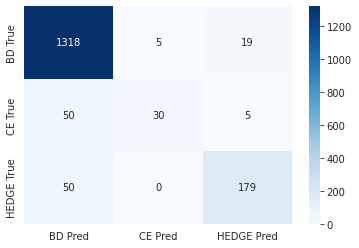

In [266]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [267]:
# Get the feature importance scores
importance_scores = clf.feature_importances_
feature_names = df.iloc[:, 15:].columns[:-1]
# Print the feature importance scores
for feature_name, importance_score in zip(feature_names, importance_scores):
    print(f'{feature_name}: {importance_score:.4f}')

all: 0.0082
min: 0.0104
max: 0.0121
avg: 0.0304
qav: 0.0152
std: 0.0132
ske: 0.0187
kur: 0.0212
hom: 0.0096
p10: 0.0110
p25: 0.0110
p50: 0.0147
p75: 0.0093
p90: 0.0082
b10: 0.0167
b20: 0.0128
b30: 0.0116
b40: 0.0107
b50: 0.0099
b60: 0.0108
b70: 0.0110
b80: 0.0121
b90: 0.0087
d00: 0.0067
d01: 0.0334
d02: 0.0070
cov_gap: 0.0068
dns_gap: 0.0199
height: 0.0373
crownArea: 0.0129
SArea: 0.0103
Min_Slope: 0.0218
Max_Slope: 0.0179
Avg_Slope: 0.0075
Z_Mean_FirstReturn: 0.0537
2018_R: 0.0118
2018_G: 0.0248
2018_B: 0.0112
2018_N: 0.0289
2020_R: 0.0258
2020_G: 0.0207
2020_B: 0.0112
2020_N: 0.0202
averageNDVI: 0.0500
1re: 0.0197
2re: 0.0081
3re: 0.0269
4re: 0.0150
FirstofManyre: 0.0030
LastofManyre: 0.0655
Lastre: 0.0152
NonFirstoverFirst: 0.0109


In [268]:
# Use the model to make predictions on the data
predictions = clf.predict(population_independent)

# Add the predictions as a new column to the DataFrame
popu = popu.assign(Functional=predictions)
popu

,treeID,min_x,min_y,max_x,max_y,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity,Functional
0,10003,527030.45,5043911.64,527034.10,5043912.86,46,100,2.68,2.91,2.87,8.23,0.04,-2.96,12.22,2.68,2.85,2.86,2.88,2.89,2.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.46,0.00,0.00,0.52,0.54,2.41,2.60,15.54,0.45,5698.07,875.34,1.36,55.82,88.93,61.68,221.14,111.17,122.33,115.17,86.50,0.24,46.00,0.00,0.00,0.00,2.00,0.00,44.00,0.00,43164.14,HEDGE
1,10004,527245.03,5043901.88,527259.66,5043916.21,8679,11003,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48,BD
2,10005,527344.70,5043902.50,527362.07,5043917.74,8936,10874,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29,BD
3,10006,527421.81,5043897.01,527442.54,5043917.74,12173,13477,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65,BD
4,10007,527151.76,5043901.58,527167.30,5043914.69,4660,5729,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30,BD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,27621,538367.08,5039095.60,538371.66,5039103.22,513,917,1.42,22.70,9.54,141.68,7.13,0.43,1.78,1.42,1.75,2.17,8.91,14.85,20.50,0.31,0.43,0.47,0.53,0.72,0.74,0.76,0.79,0.92,0.13,0.03,0.15,0.40,0.44,7.66,13.56,246.34,0.07,10000.00,3906.60,6.81,136.60,147.34,135.88,210.39,113.46,134.63,114.78,188.78,0.23,417.00,83.00,8.00,1.00,305.00,33.00,145.00,0.22,30989.68,BD
12908,27623,538339.96,5039094.69,538346.36,5039100.17,308,862,1.48,21.27,9.28,109.77,4.88,0.58,3.01,1.48,3.33,5.56,9.14,11.84,17.50,0.10,0.24,0.40,0.51,0.54,0.90,0.90,0.90,0.95,0.05,0.07,0.17,0.57,0.64,5.93,16.17,277.07,0.12,10000.00,3781.20,5.10,165.63,160.12,158.66,192.75,141.14,147.91,131.79,173.26,0.09,262.00,41.00,5.00,0.00,247.00,10.00,25.00,0.18,29726.94,BD
12909,27625,538308.26,5039093.77,538311.61,5039097.12,137,389,2.09,20.93,9.58,112.64,4.59,0.14,3.27,2.09,2.54,6.77,11.29,11.49,11.60,0.20,0.22,0.26,0.34,0.43,0.93,0.93,0.93,0.96,0.08,0.02,0.23,0.61,0.65,4.13,6.22,91.12,0.20,8227.38,2632.09,4.00,175.43,169.66,168.01,189.06,176.60,175.90,162.10,144.40,-0.03,126.00,9.00,2.00,0.00,116.00,1.00,11.00,0.09,30093.06,BD
12910,27627,538247.30,5039092.86,538252.48,5039096.21,322,654,1.47,19.59,7.68,86.12,5.21,0.34,2.18,1.47,1.81,2.02,9.07,11.32,11.53,0.38,0.41,0.45,0.48,0.55,0.92,0.92,0.93,0.95,0.08,0.03,0.22,0.41,0.51,6.09,9.94,190.38,0.00,6532.73,3023.02,4.67,142.02,149.63,140.15,206.12,164.38,162.97,146.79,122.10,0.02,278.00,39.00,1.00,0.00,211.00,15.00,82.00,0.14,28572.19,BD


## Apply the results to predict population

# Good/Fair/Bad and **Hedge** (Condition)(Oversample)(RandomForestClassifier)
Null: 0.4338
Result: 

In [269]:
category = "Condition"
df = dfTrain
n_bootstrap = 1
null_accuracy = 0.4338
clf = RandomForestClassifier(n_estimators=100, criterion='gini')
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2923.00,3720.00,2.15,8.83,5.59,33.14,1.38,-0.25,2.30,2.15,3.60,4.65,5.70,6.64,7.35,0.00,0.03,0.10,0.20,0.36,0.53,0.74,0.90,0.99,0.26,0.51,0.01,0.10,0.21,7.31,73.58,312.72,0.07,10000.00,797.86,4.70,65.47,71.15,76.32,209.47,52.63,67.13,78.11,173.28,0.53,2230.00,612.00,78.00,3.00,977.00,398.00,1651.00,0.31,35339.32
1423,648.00,1217.00,1.83,20.62,4.57,38.45,4.20,2.47,8.13,1.83,2.29,2.61,3.00,3.82,12.53,0.62,0.86,0.86,0.86,0.88,0.95,0.95,0.96,0.97,0.45,0.00,0.05,0.34,0.47,4.32,16.26,93.32,0.02,7400.21,1317.81,2.82,131.98,138.87,129.06,210.63,111.91,128.89,111.58,179.04,0.23,540.00,98.00,10.00,0.00,394.00,39.00,185.00,0.20,28135.22
1424,639.00,1275.00,1.75,20.26,4.62,40.23,4.35,2.19,6.74,1.75,2.18,2.36,2.78,3.84,12.36,0.63,0.84,0.84,0.84,0.86,0.95,0.95,0.97,0.97,0.42,0.00,0.05,0.36,0.50,4.62,17.37,123.19,0.08,8304.10,1634.19,2.87,143.28,146.60,138.83,205.50,115.20,129.49,112.53,174.22,0.19,518.00,108.00,13.00,0.00,399.00,47.00,166.00,0.23,28431.04
1425,7.00,53.00,9.09,19.52,14.21,223.59,5.04,0.18,0.99,9.09,9.13,10.24,11.37,19.50,19.52,0.00,0.00,0.00,0.00,0.17,0.50,0.50,0.50,0.50,0.00,0.00,0.07,0.85,0.87,2.94,1.02,4.58,0.09,10000.00,4094.38,2.88,197.18,178.55,160.91,217.09,179.00,174.67,149.00,199.00,0.05,7.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,31167.55


length: 1427
Condition
Fair    1002
Good     359
Poor      66
dtype: int64


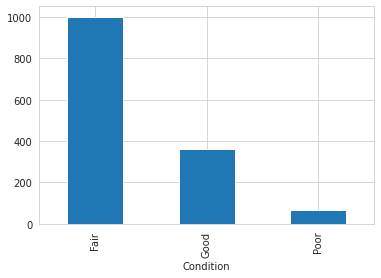

In [270]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(df))
print(counts)

In [271]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
sm = SMOTE(random_state=42)
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    clf.fit(X_train_res, y_train_res)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [nan, nan]
Mean: 0.67832
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.17832168, 0.27832168, 0.37832168, 0.47832168, 0.57832168,
        0.67832168, 0.77832168, 0.87832168, 0.97832168, 1.07832168,
        1.17832168]),
 <BarContainer object of 10 artists>)

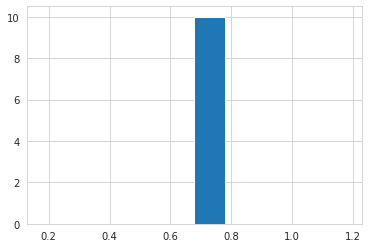

In [272]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [273]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.0 Train Accuracy
0.6748251748251748 Test Accuracy
              precision    recall  f1-score   support

        Fair       0.81      0.75      0.78       192
        Good       0.49      0.60      0.54        78
        Poor       0.15      0.12      0.14        16

    accuracy                           0.67       286
   macro avg       0.49      0.49      0.49       286
weighted avg       0.69      0.67      0.68       286



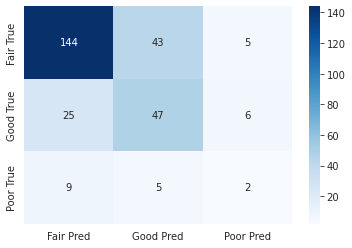

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
clf.fit(X_train_res, y_train_res)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [275]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.75524476 0.72727273 0.76491228 0.73684211 0.72982456]
Cross-validation scores: [0.75524476 0.72727273 0.76491228 0.73684211 0.72982456]
Mean accuracy: 0.743


RandomForestClassifier()

Confusion matrix:
[[914  87   1]
 [215 143   1]
 [ 55  11   0]]
              precision    recall  f1-score   support

        Fair       0.77      0.91      0.84      1002
        Good       0.59      0.40      0.48       359
        Poor       0.00      0.00      0.00        66

    accuracy                           0.74      1427
   macro avg       0.46      0.44      0.44      1427
weighted avg       0.69      0.74      0.71      1427



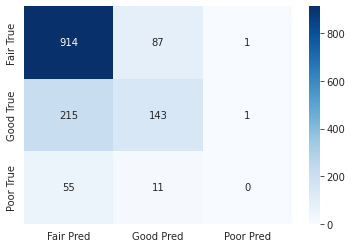

In [276]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [277]:
# Get the feature importance scores
importance_scores = clf.feature_importances_
feature_names = df.iloc[:, 15:].columns[:-1]
# Print the feature importance scores
for feature_name, importance_score in zip(feature_names, importance_scores):
    print(f'{feature_name}: {importance_score:.4f}')

all: 0.0208
min: 0.0304
max: 0.0141
avg: 0.0191
qav: 0.0257
std: 0.0174
ske: 0.0138
kur: 0.0146
hom: 0.0167
p10: 0.0146
p25: 0.0211
p50: 0.0277
p75: 0.0290
p90: 0.0129
b10: 0.0168
b20: 0.0144
b30: 0.0175
b40: 0.0161
b50: 0.0143
b60: 0.0135
b70: 0.0126
b80: 0.0137
b90: 0.0154
d00: 0.0176
d01: 0.0209
d02: 0.0115
cov_gap: 0.0102
dns_gap: 0.0182
height: 0.0208
crownArea: 0.0160
SArea: 0.0360
Min_Slope: 0.0288
Max_Slope: 0.0107
Avg_Slope: 0.0119
Z_Mean_FirstReturn: 0.0174
2018_R: 0.0249
2018_G: 0.0162
2018_B: 0.0161
2018_N: 0.0158
2020_R: 0.0216
2020_G: 0.0188
2020_B: 0.0155
2020_N: 0.0199
averageNDVI: 0.0266
1re: 0.0166
2re: 0.0357
3re: 0.0170
4re: 0.0102
FirstofManyre: 0.0078
LastofManyre: 0.0215
Lastre: 0.0163
NonFirstoverFirst: 0.0264


In [278]:
# Use the model to make predictions on the data
predictions = clf.predict(population_independent)

# Add the predictions as a new column to the DataFrame
popu = popu.assign(Condition=predictions)
popu

,treeID,min_x,min_y,max_x,max_y,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity,Functional,Condition
0,10003,527030.45,5043911.64,527034.10,5043912.86,46,100,2.68,2.91,2.87,8.23,0.04,-2.96,12.22,2.68,2.85,2.86,2.88,2.89,2.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.46,0.00,0.00,0.52,0.54,2.41,2.60,15.54,0.45,5698.07,875.34,1.36,55.82,88.93,61.68,221.14,111.17,122.33,115.17,86.50,0.24,46.00,0.00,0.00,0.00,2.00,0.00,44.00,0.00,43164.14,HEDGE,Good
1,10004,527245.03,5043901.88,527259.66,5043916.21,8679,11003,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48,BD,Fair
2,10005,527344.70,5043902.50,527362.07,5043917.74,8936,10874,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29,BD,Fair
3,10006,527421.81,5043897.01,527442.54,5043917.74,12173,13477,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65,BD,Fair
4,10007,527151.76,5043901.58,527167.30,5043914.69,4660,5729,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30,BD,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,27621,538367.08,5039095.60,538371.66,5039103.22,513,917,1.42,22.70,9.54,141.68,7.13,0.43,1.78,1.42,1.75,2.17,8.91,14.85,20.50,0.31,0.43,0.47,0.53,0.72,0.74,0.76,0.79,0.92,0.13,0.03,0.15,0.40,0.44,7.66,13.56,246.34,0.07,10000.00,3906.60,6.81,136.60,147.34,135.88,210.39,113.46,134.63,114.78,188.78,0.23,417.00,83.00,8.00,1.00,305.00,33.00,145.00,0.22,30989.68,BD,Good
12908,27623,538339.96,5039094.69,538346.36,5039100.17,308,862,1.48,21.27,9.28,109.77,4.88,0.58,3.01,1.48,3.33,5.56,9.14,11.84,17.50,0.10,0.24,0.40,0.51,0.54,0.90,0.90,0.90,0.95,0.05,0.07,0.17,0.57,0.64,5.93,16.17,277.07,0.12,10000.00,3781.20,5.10,165.63,160.12,158.66,192.75,141.14,147.91,131.79,173.26,0.09,262.00,41.00,5.00,0.00,247.00,10.00,25.00,0.18,29726.94,BD,Good
12909,27625,538308.26,5039093.77,538311.61,5039097.12,137,389,2.09,20.93,9.58,112.64,4.59,0.14,3.27,2.09,2.54,6.77,11.29,11.49,11.60,0.20,0.22,0.26,0.34,0.43,0.93,0.93,0.93,0.96,0.08,0.02,0.23,0.61,0.65,4.13,6.22,91.12,0.20,8227.38,2632.09,4.00,175.43,169.66,168.01,189.06,176.60,175.90,162.10,144.40,-0.03,126.00,9.00,2.00,0.00,116.00,1.00,11.00,0.09,30093.06,BD,Good
12910,27627,538247.30,5039092.86,538252.48,5039096.21,322,654,1.47,19.59,7.68,86.12,5.21,0.34,2.18,1.47,1.81,2.02,9.07,11.32,11.53,0.38,0.41,0.45,0.48,0.55,0.92,0.92,0.93,0.95,0.08,0.03,0.22,0.41,0.51,6.09,9.94,190.38,0.00,6532.73,3023.02,4.67,142.02,149.63,140.15,206.12,164.38,162.97,146.79,122.10,0.02,278.00,39.00,1.00,0.00,211.00,15.00,82.00,0.14,28572.19,BD,Good


## Apply the results to predict population

# 6 Families and **Hedge** (Family)(Oversample)(RandomForestClassifier)
Null: 0.2281
Results: 
200 estimators

In [279]:
category = "Family"
df = dfTrainHedge[dfTrainHedge['Family'].isin(['Sapindaceae', 'Rosaceae', 'Fagaceae','Cornaceae','Betulaceae','Pinaceae','HEDGE'])]
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
clf = RandomForestClassifier(n_estimators=100, criterion='gini')
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X

,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,664.00,917.00,1.38,6.32,3.04,9.52,0.51,0.46,8.64,1.38,2.42,2.71,3.10,3.42,3.54,0.01,0.07,0.35,0.67,0.99,0.99,0.99,0.99,0.99,0.70,0.00,0.00,0.19,0.28,3.30,19.05,53.85,0.23,10000.00,532.71,2.13,74.22,103.43,79.29,203.58,64.65,99.75,82.86,187.39,0.48,640.00,35.00,2.00,0.00,125.00,34.00,549.00,0.06,40555.11
1654,590.00,840.00,1.39,5.73,3.73,15.07,1.09,-0.60,2.46,1.39,1.82,3.15,3.96,4.53,4.97,0.10,0.15,0.18,0.25,0.35,0.51,0.72,0.87,0.96,0.55,0.06,0.00,0.22,0.30,4.21,14.03,58.71,0.22,4141.35,608.00,2.68,72.26,95.11,77.32,182.05,50.42,82.21,78.82,145.08,0.46,536.00,48.00,1.00,0.00,139.00,37.00,434.00,0.09,38844.21
1655,800.00,1262.00,1.38,5.55,3.78,15.34,1.02,-0.75,2.64,1.38,2.06,3.12,4.04,4.52,4.93,0.07,0.12,0.15,0.24,0.31,0.42,0.62,0.83,0.96,0.52,0.05,0.00,0.25,0.37,4.31,20.90,81.26,0.10,7337.97,658.65,2.50,67.90,88.12,70.49,179.86,57.24,89.37,82.56,161.15,0.46,727.00,38.00,1.00,0.00,211.00,25.00,541.00,0.05,38025.27
1656,379.00,606.00,1.46,2.63,2.30,5.35,0.22,-1.19,4.08,1.46,1.96,2.18,2.37,2.46,2.53,0.00,0.01,0.03,0.07,0.11,0.20,0.32,0.52,0.85,0.56,0.00,0.00,0.33,0.38,3.82,15.14,42.14,0.18,3129.18,443.05,1.46,108.53,128.66,108.48,219.67,66.11,94.11,81.68,189.18,0.41,377.00,0.00,0.00,0.00,73.00,0.00,304.00,0.00,40076.40


length: 1427
Family
Sapindaceae    467
Rosaceae       260
HEDGE          229
Fagaceae        85
Cornaceae       78
Betulaceae      75
Pinaceae        64
dtype: int64


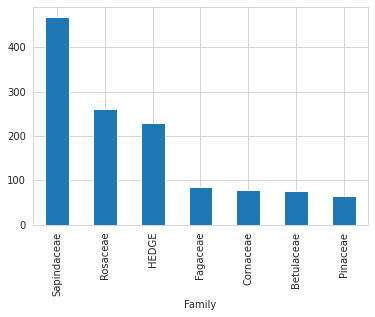

In [280]:
counts = df.groupby(category).size().sort_values(ascending=False)
counts.plot(kind= "bar")
print("length:",len(dfTrain))
print(counts)

In [281]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
sm = SMOTE(random_state=42)
for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    clf.fit(X_train_res, y_train_res)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    test_stats.append(accuracy)
    
# Calculate the mean
mean = np.mean(test_stats)
# Calculate the standard deviation
std = np.std(test_stats)

Confidence interval: [nan, nan]
Mean: 0.66270
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.16269841, 0.26269841, 0.36269841, 0.46269841, 0.56269841,
        0.66269841, 0.76269841, 0.86269841, 0.96269841, 1.06269841,
        1.16269841]),
 <BarContainer object of 10 artists>)

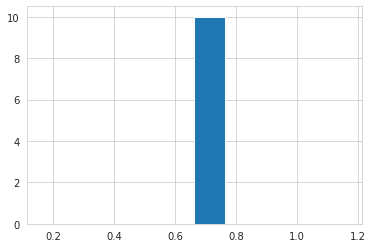

In [282]:
# Confidence interval
n = len(test_stats)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_stats, density=True)

In [283]:
# Define the new value to test
sample_mean = np.mean(test_stats)
sample_std = np.std(test_stats, ddof=1)
sample_size = len(test_stats)

# Calculate the t-statistic and p-value
t_stat = (sample_mean - null_accuracy) / (sample_std)
p_value = 2 * stdtr(sample_size - 1, -np.abs(t_stat))

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.0 Train Accuracy
0.6309523809523809 Test Accuracy
              precision    recall  f1-score   support

  Betulaceae       0.60      0.56      0.58        16
   Cornaceae       0.50      0.55      0.52        22
    Fagaceae       0.38      0.53      0.44        15
       HEDGE       0.78      0.98      0.87        44
    Pinaceae       0.50      0.45      0.48        11
    Rosaceae       0.43      0.50      0.46        48
 Sapindaceae       0.82      0.60      0.69        96

    accuracy                           0.63       252
   macro avg       0.57      0.60      0.58       252
weighted avg       0.66      0.63      0.63       252



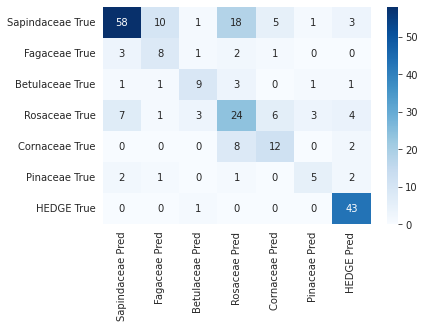

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
clf.fit(X_train_res, y_train_res)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_trainpred = clf.predict(X_train)
# Calculate the accuracy of the model
accuracyTrain = accuracy_score(y_train, y_trainpred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracyTrain, "Train Accuracy")
print(accuracy, 'Test Accuracy')

label = list(df[category].unique())
label_t = []
for word in label:
    new_word = word + " True"
    label_t.append(new_word)
label_p = []
for word in label:
    new_word = word + " Pred"
    label_p.append(new_word)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

In [285]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf)
print(scores)
# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")
# Train the final model on the full dataset
clf.fit(X, y)

[0.63888889 0.69444444 0.68650794 0.70119522 0.70517928]
Cross-validation scores: [0.63888889 0.69444444 0.68650794 0.70119522 0.70517928]
Mean accuracy: 0.685


RandomForestClassifier()

Confusion matrix:
[[ 24   1   1   3   1  15  30]
 [  1  21   3  13   0  31   9]
 [  2   3  29   2   1  17  31]
 [  1   2   0 214   0  10   2]
 [  0   0   1   7  29  12  15]
 [  1   8   2  18   5 170  56]
 [  0   6   9  14   1  60 377]]
              precision    recall  f1-score   support

  Betulaceae       0.83      0.32      0.46        75
   Cornaceae       0.51      0.27      0.35        78
    Fagaceae       0.64      0.34      0.45        85
       HEDGE       0.79      0.93      0.86       229
    Pinaceae       0.78      0.45      0.57        64
    Rosaceae       0.54      0.65      0.59       260
 Sapindaceae       0.72      0.81      0.76       467

    accuracy                           0.69      1258
   macro avg       0.69      0.54      0.58      1258
weighted avg       0.69      0.69      0.67      1258



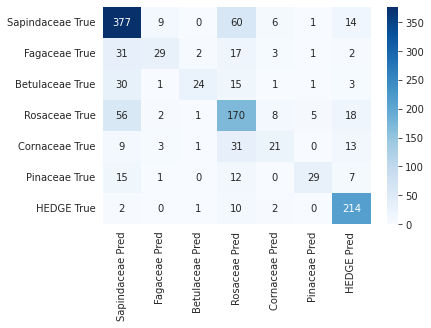

In [286]:
# Define the number of folds
n_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Get the predicted target values using cross_val_predict()
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Get the confusion matrix using confusion_matrix()
cm = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred, labels=label)
# Convert the matrix to a pandas DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_mat, index=label_t, columns=label_p)
# Create a heatmap of the confusion matrix using seaborn
sb.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
# Generate the classification report
report = classification_report(y, y_pred)
print(report)

In [287]:
# Get the feature importance scores
importance_scores = clf.feature_importances_
feature_names = df.iloc[:, 15:].columns[:-1]
# Print the feature importance scores
for feature_name, importance_score in zip(feature_names, importance_scores):
    print(f'{feature_name}: {importance_score:.4f}')

all: 0.0135
min: 0.0146
max: 0.0128
avg: 0.0186
qav: 0.0156
std: 0.0177
ske: 0.0230
kur: 0.0132
hom: 0.0103
p10: 0.0121
p25: 0.0132
p50: 0.0133
p75: 0.0198
p90: 0.0190
b10: 0.0207
b20: 0.0124
b30: 0.0141
b40: 0.0122
b50: 0.0129
b60: 0.0116
b70: 0.0109
b80: 0.0126
b90: 0.0134
d00: 0.0120
d01: 0.0203
d02: 0.0091
cov_gap: 0.0228
dns_gap: 0.0197
height: 0.0290
crownArea: 0.0244
SArea: 0.0177
Min_Slope: 0.0278
Max_Slope: 0.0138
Avg_Slope: 0.0087
Z_Mean_FirstReturn: 0.0276
2018_R: 0.0271
2018_G: 0.0154
2018_B: 0.0143
2018_N: 0.0234
2020_R: 0.0147
2020_G: 0.0186
2020_B: 0.0174
2020_N: 0.0215
averageNDVI: 0.0325
1re: 0.0275
2re: 0.0116
3re: 0.0190
4re: 0.0234
FirstofManyre: 0.0178
LastofManyre: 0.0392
Lastre: 0.0223
NonFirstoverFirst: 0.0146


In [288]:
# Use the model to make predictions on the data
predictions = clf.predict(population_independent)

# Add the predictions as a new column to the DataFrame
popu = popu.assign(Family=predictions)
popu

,treeID,min_x,min_y,max_x,max_y,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity,Functional,Condition,Family
0,10003,527030.45,5043911.64,527034.10,5043912.86,46,100,2.68,2.91,2.87,8.23,0.04,-2.96,12.22,2.68,2.85,2.86,2.88,2.89,2.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.46,0.00,0.00,0.52,0.54,2.41,2.60,15.54,0.45,5698.07,875.34,1.36,55.82,88.93,61.68,221.14,111.17,122.33,115.17,86.50,0.24,46.00,0.00,0.00,0.00,2.00,0.00,44.00,0.00,43164.14,HEDGE,Good,HEDGE
1,10004,527245.03,5043901.88,527259.66,5043916.21,8679,11003,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48,BD,Fair,Sapindaceae
2,10005,527344.70,5043902.50,527362.07,5043917.74,8936,10874,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29,BD,Fair,Sapindaceae
3,10006,527421.81,5043897.01,527442.54,5043917.74,12173,13477,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65,BD,Fair,Fagaceae
4,10007,527151.76,5043901.58,527167.30,5043914.69,4660,5729,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30,BD,Fair,Sapindaceae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,27621,538367.08,5039095.60,538371.66,5039103.22,513,917,1.42,22.70,9.54,141.68,7.13,0.43,1.78,1.42,1.75,2.17,8.91,14.85,20.50,0.31,0.43,0.47,0.53,0.72,0.74,0.76,0.79,0.92,0.13,0.03,0.15,0.40,0.44,7.66,13.56,246.34,0.07,10000.00,3906.60,6.81,136.60,147.34,135.88,210.39,113.46,134.63,114.78,188.78,0.23,417.00,83.00,8.00,1.00,305.00,33.00,145.00,0.22,30989.68,BD,Good,Betulaceae
12908,27623,538339.96,5039094.69,538346.36,5039100.17,308,862,1.48,21.27,9.28,109.77,4.88,0.58,3.01,1.48,3.33,5.56,9.14,11.84,17.50,0.10,0.24,0.40,0.51,0.54,0.90,0.90,0.90,0.95,0.05,0.07,0.17,0.57,0.64,5.93,16.17,277.07,0.12,10000.00,3781.20,5.10,165.63,160.12,158.66,192.75,141.14,147.91,131.79,173.26,0.09,262.00,41.00,5.00,0.00,247.00,10.00,25.00,0.18,29726.94,BD,Good,Rosaceae
12909,27625,538308.26,5039093.77,538311.61,5039097.12,137,389,2.09,20.93,9.58,112.64,4.59,0.14,3.27,2.09,2.54,6.77,11.29,11.49,11.60,0.20,0.22,0.26,0.34,0.43,0.93,0.93,0.93,0.96,0.08,0.02,0.23,0.61,0.65,4.13,6.22,91.12,0.20,8227.38,2632.09,4.00,175.43,169.66,168.01,189.06,176.60,175.90,162.10,144.40,-0.03,126.00,9.00,2.00,0.00,116.00,1.00,11.00,0.09,30093.06,BD,Good,Rosaceae
12910,27627,538247.30,5039092.86,538252.48,5039096.21,322,654,1.47,19.59,7.68,86.12,5.21,0.34,2.18,1.47,1.81,2.02,9.07,11.32,11.53,0.38,0.41,0.45,0.48,0.55,0.92,0.92,0.93,0.95,0.08,0.03,0.22,0.41,0.51,6.09,9.94,190.38,0.00,6532.73,3023.02,4.67,142.02,149.63,140.15,206.12,164.38,162.97,1

# DBH Random Forest

In [289]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

category = "DBH"
df = dfTrain
df = df.drop(df[df[category] == 0].index)
n_bootstrap = 1
# (467/1260)^2+(260/1260)^2+(231/1260)^2+(85/1260)^2+(78/1260)^2+(75/1260)^2+(64/1260)^2
null_accuracy = 0.2281
model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
X = df.iloc[:, 14:].astype(np.float64)
y = df[category]
X


,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity
0,8679.00,11003.00,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48
1,8936.00,10874.00,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29
2,12173.00,13477.00,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65
3,4660.00,5729.00,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30
4,9236.00,11215.00,1.38,15.31,10.62,121.20,2.91,-0.56,2.44,1.38,6.35,8.48,10.98,13.12,14.00,0.00,0.03,0.06,0.13,0.24,0.36,0.51,0.66,0.88,0.03,0.14,0.64,0.12,0.18,14.52,180.23,1373.90,0.00,10000.00,1835.90,8.29,65.26,82.08,72.45,214.03,47.70,82.73,74.37,182.02,0.56,7040.00,1902.00,274.00,16.00,2660.00,1555.00,5935.00,0.31,38785.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2923.00,3720.00,2.15,8.83,5.59,33.14,1.38,-0.25,2.30,2.15,3.60,4.65,5.70,6.64,7.35,0.00,0.03,0.10,0.20,0.36,0.53,0.74,0.90,0.99,0.26,0.51,0.01,0.10,0.21,7.31,73.58,312.72,0.07,10000.00,797.86,4.70,65.47,71.15,76.32,209.47,52.63,67.13,78.11,173.28,0.53,2230.00,612.00,78.00,3.00,977.00,398.00,1651.00,0.31,35339.32
1423,648.00,1217.00,1.83,20.62,4.57,38.45,4.20,2.47,8.13,1.83,2.29,2.61,3.00,3.82,12.53,0.62,0.86,0.86,0.86,0.88,0.95,0.95,0.96,0.97,0.45,0.00,0.05,0.34,0.47,4.32,16.26,93.32,0.02,7400.21,1317.81,2.82,131.98,138.87,129.06,210.63,111.91,128.89,111.58,179.04,0.23,540.00,98.00,10.00,0.00,394.00,39.00,185.00,0.20,28135.22
1424,639.00,1275.00,1.75,20.26,4.62,40.23,4.35,2.19,6.74,1.75,2.18,2.36,2.78,3.84,12.36,0.63,0.84,0.84,0.84,0.86,0.95,0.95,0.97,0.97,0.42,0.00,0.05,0.36,0.50,4.62,17.37,123.19,0.08,8304.10,1634.19,2.87,143.28,146.60,138.83,205.50,115.20,129.49,112.53,174.22,0.19,518.00,108.00,13.00,0.00,399.00,47.00,166.00,0.23,28431.04
1425,7.00,53.00,9.09,19.52,14.21,223.59,5.04,0.18,0.99,9.09,9.13,10.24,11.37,19.50,19.52,0.00,0.00,0.00,0.00,0.17,0.50,0.50,0.50,0.50,0.00,0.00,0.07,0.85,0.87,2.94,1.02,4.58,0.09,10000.00,4094.38,2.88,197.18,178.55,160.91,217.09,179.00,174.67,149.00,199.00,0.05,7.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,31167.55


r2 value 0.7448261378479041
Confidence interval: [nan, nan]
Mean RMSE: 5.25705
Standard deviation: 0.0000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([4.75704895, 4.85704895, 4.95704895, 5.05704895, 5.15704895,
        5.25704895, 5.35704895, 5.45704895, 5.55704895, 5.65704895,
        5.75704895]),
 <BarContainer object of 10 artists>)

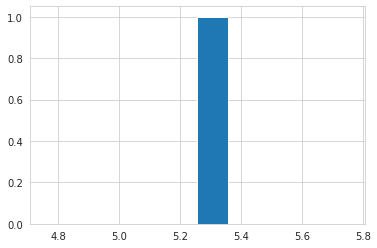

In [290]:
# bootstrap
# Bootstrap the data and calculate the test statistic on each bootstrap sample
test_stats = []
test_RMSE = []

for i in range(n_bootstrap):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate the accuracy of the model
    test_r2 = model.score(X_test, y_test)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_stats.append(test_r2)
    test_RMSE.append(test_rmse)

# Calculate the mean
print("r2 value", np.mean(test_stats))

# Calculate the mean
mean = np.mean(test_RMSE)
# Calculate the standard deviation
std = np.std(test_RMSE)
# Confidence interval
n = len(test_RMSE)
confidence_level = 0.95
ci = t.interval(confidence_level, n - 1, loc=mean, scale=std)
print(f"Confidence interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

# Print the results
print("Mean RMSE: {:.5f}".format(mean))
print("Standard deviation: {:.4f}".format(std))
plt.hist(test_RMSE, density=False)


RMSE 5.014389154171591


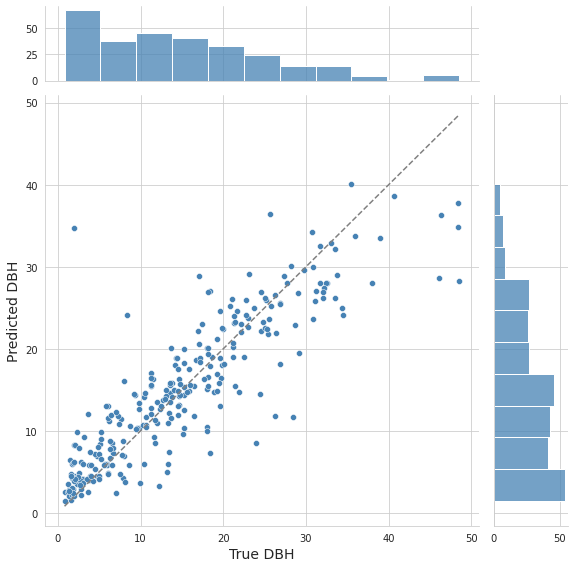

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the accuracy of the model
# test_r2 = model.score(X_test, y_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE",test_rmse)



# plot the test_y and pred_y using jointplot with annotations
sns.set_style('whitegrid')
g = sns.jointplot(x=y_test, y=y_pred, kind='scatter', color='steelblue', height=8, ratio=5, marginal_ticks=True)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')
g.ax_joint.set_xlabel('True DBH', fontsize=14)
g.ax_joint.set_ylabel('Predicted DBH', fontsize=14)
# g.ax_joint.set_title('Predicted vs Actual Values', fontsize=16)
plt.show()

In [292]:
# Use the model to make predictions on the data
predictions = model.predict(population_independent)

# Add the predictions as a new column to the DataFrame
popu = popu.assign(DBH=predictions)
popu

,treeID,min_x,min_y,max_x,max_y,abv,all,min,max,avg,qav,std,ske,kur,hom,p10,p25,p50,p75,p90,b10,b20,b30,b40,b50,b60,b70,b80,b90,d00,d01,d02,cov_gap,dns_gap,height,crownArea,SArea,Min_Slope,Max_Slope,Avg_Slope,Z_Mean_FirstReturn,2018_R,2018_G,2018_B,2018_N,2020_R,2020_G,2020_B,2020_N,averageNDVI,1re,2re,3re,4re,FirstofManyre,LastofManyre,Lastre,NonFirstoverFirst,Intensity,Functional,Condition,Family,DBH
0,10003,527030.45,5043911.64,527034.10,5043912.86,46,100,2.68,2.91,2.87,8.23,0.04,-2.96,12.22,2.68,2.85,2.86,2.88,2.89,2.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.46,0.00,0.00,0.52,0.54,2.41,2.60,15.54,0.45,5698.07,875.34,1.36,55.82,88.93,61.68,221.14,111.17,122.33,115.17,86.50,0.24,46.00,0.00,0.00,0.00,2.00,0.00,44.00,0.00,43164.14,HEDGE,Good,HEDGE,5.76
1,10004,527245.03,5043901.88,527259.66,5043916.21,8679,11003,1.37,14.93,7.99,72.76,2.98,-0.23,2.19,1.37,3.69,5.82,8.25,10.30,11.78,0.04,0.15,0.22,0.33,0.49,0.65,0.81,0.94,0.99,0.14,0.22,0.42,0.17,0.21,11.35,139.17,1273.63,0.00,10000.00,1671.15,6.61,61.62,79.08,64.92,202.11,56.24,89.45,79.05,184.66,0.53,6025.00,2200.00,402.00,31.00,3071.00,1898.00,4852.00,0.44,33628.48,BD,Fair,Sapindaceae,15.83
2,10005,527344.70,5043902.50,527362.07,5043917.74,8936,10874,1.44,16.93,8.16,78.78,3.48,0.25,2.26,1.44,3.47,5.50,8.00,10.26,13.43,0.05,0.20,0.28,0.46,0.61,0.78,0.84,0.93,0.98,0.19,0.22,0.39,0.15,0.18,14.41,168.25,1121.49,0.00,10000.00,1244.77,7.16,46.58,53.65,59.16,175.47,45.34,67.62,73.77,170.05,0.58,5606.00,2523.00,551.00,66.00,3375.00,2303.00,4534.00,0.56,35488.29,BD,Fair,Sapindaceae,16.31
3,10006,527421.81,5043897.01,527442.54,5043917.74,12173,13477,1.38,20.67,14.60,230.76,4.20,-0.84,2.66,1.38,8.02,11.57,15.86,17.97,18.96,0.01,0.02,0.07,0.15,0.24,0.30,0.40,0.60,0.87,0.01,0.07,0.28,0.02,0.10,19.27,297.94,1331.66,0.14,10000.00,1511.67,13.89,45.64,68.58,58.75,209.19,44.47,83.14,73.68,189.25,0.63,8062.00,3145.00,656.00,77.00,3883.00,2540.00,6719.00,0.48,37336.65,BD,Fair,Fagaceae,32.11
4,10007,527151.76,5043901.58,527167.30,5043914.69,4660,5729,1.38,11.57,7.80,64.71,1.97,-0.93,3.61,1.38,5.22,6.57,8.28,9.28,9.92,0.02,0.04,0.06,0.11,0.24,0.38,0.55,0.81,0.98,0.06,0.29,0.45,0.15,0.19,9.69,97.46,700.19,0.00,10000.00,1402.57,5.97,57.55,72.19,67.12,201.59,53.13,81.30,77.64,187.81,0.56,3822.00,726.00,97.00,4.00,1154.00,630.00,3298.00,0.22,36624.30,BD,Fair,Sapindaceae,15.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,27621,538367.08,5039095.60,538371.66,5039103.22,513,917,1.42,22.70,9.54,141.68,7.13,0.43,1.78,1.42,1.75,2.17,8.91,14.85,20.50,0.31,0.43,0.47,0.53,0.72,0.74,0.76,0.79,0.92,0.13,0.03,0.15,0.40,0.44,7.66,13.56,246.34,0.07,10000.00,3906.60,6.81,136.60,147.34,135.88,210.39,113.46,134.63,114.78,188.78,0.23,417.00,83.00,8.00,1.00,305.00,33.00,145.00,0.22,30989.68,BD,Good,Betulaceae,11.22
12908,27623,538339.96,5039094.69,538346.36,5039100.17,308,862,1.48,21.27,9.28,109.77,4.88,0.58,3.01,1.48,3.33,5.56,9.14,11.84,17.50,0.10,0.24,0.40,0.51,0.54,0.90,0.90,0.90,0.95,0.05,0.07,0.17,0.57,0.64,5.93,16.17,277.07,0.12,10000.00,3781.20,5.10,165.63,160.12,158.66,192.75,141.14,147.91,131.79,173.26,0.09,262.00,41.00,5.00,0.00,247.00,10.00,25.00,0.18,29726.94,BD,Good,Rosaceae,13.39
12909,27625,538308.26,5039093.77,538311.61,5039097.12,137,389,2.09,20.93,9.58,112.64,4.59,0.14,3.27,2.09,2.54,6.77,11.29,11.49,11.60,0.20,0.22,0.26,0.34,0.43,0.93,0.93,0.93,0.96,0.08,0.02,0.23,0.61,0.65,4.13,6.22,91.12,0.20,8227.38,2632.09,4.00,175.43,169.66,168.01,189.06,176.60,175.90,162.10,144.40,-0.03,126.00,9.00,2.00,0.00,116.00,1.00,11.00,0.09,30093.06,BD,Good,Rosaceae,12.01
12910,27627,538247.30,5039092.86,538252.48,5039096.21,322,654,1.47,19.59,7.68,86.12,5.21,0.34,2.18,1.47,1.81,2.02,9.07,11.32,11.53,0.38,0.41,0.45,0.48,0.55,0.92,0.92,0.93,0.95,0.08,0.03,0.22,0.41,0.51,6.09,9.94,190.38,0.00,6532.73,3

In [293]:
# Check if any value in the DataFrame is too large or infinite
if popu.isin([np.nan, np.inf, -np.inf]).any().any():
    print("There are infinite or too large values in the DataFrame.")
else:
    print("There are no infinite or too large values in the DataFrame.")

# Filter the DataFrame to show rows with infinite values
mask = popu.isin([np.inf, -np.inf])
filtered_df = popu.loc[mask.any(axis=1)]

# Print out the filtered DataFrame
print("The rows with infinite values in the DataFrame are:")
print(filtered_df)

There are no infinite or too large values in the DataFrame.
The rows with infinite values in the DataFrame are:
Empty DataFrame
Columns: [treeID, min_x, min_y, max_x, max_y, abv, all, min, max, avg, qav, std, ske, kur, hom, p10, p25, p50, p75, p90, b10, b20, b30, b40, b50, b60, b70, b80, b90, d00, d01, d02, cov_gap, dns_gap, height, crownArea, SArea, Min_Slope, Max_Slope, Avg_Slope, Z_Mean_FirstReturn, 2018_R, 2018_G, 2018_B, 2018_N, 2020_R, 2020_G, 2020_B, 2020_N, averageNDVI, 1re, 2re, 3re, 4re, FirstofManyre, LastofManyre, Lastre, NonFirstoverFirst, Intensity, Functional, Condition, Family, DBH]
Index: []


# Exploration of Prediction Results

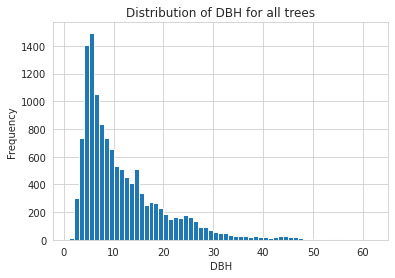

In [294]:
# round the values in the column to the nearest integer
popu['DBH'] = popu['DBH'].round()

# calculate the minimum and maximum values of the column
min_value = int(popu['DBH'].min())
max_value = int(popu['DBH'].max())

# create bins with a width of 1
bins = range(min_value, max_value + 2, 1)

# plot the histogram
plt.hist(popu['DBH'], bins=bins)

# set the title and labels for the plot
plt.title('Distribution of DBH for all trees')
plt.xlabel('DBH')
plt.ylabel('Frequency')

# show the plot
plt.show()

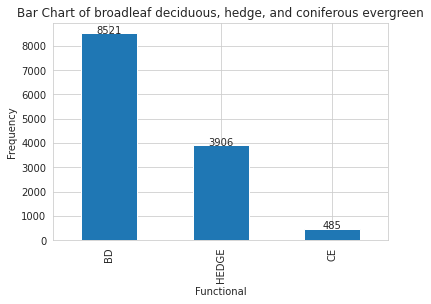

In [295]:
# count the frequency of each category in the column
category_counts = popu['Functional'].value_counts()

# create a bar chart of the category counts
category_counts.plot.bar()

# create a bar chart of the category counts
ax = category_counts.plot.bar()

# set the title and labels for the plot
plt.title('Bar Chart of broadleaf deciduous, hedge, and coniferous evergreen')
plt.xlabel('Functional')
plt.ylabel('Frequency')

# add text labels for the counts on each bar
for i, v in enumerate(category_counts.values):
    ax.text(i, v + 0.2, str(v), ha='center')

# show the plot
plt.show()

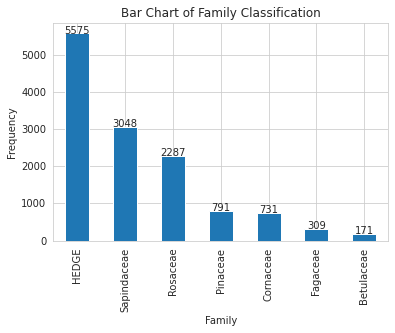

In [296]:
# count the frequency of each category in the column
category_counts = popu['Family'].value_counts()

# create a bar chart of the category counts
category_counts.plot.bar()

# create a bar chart of the category counts
ax = category_counts.plot.bar()

# set the title and labels for the plot
plt.title('Bar Chart of Family Classification')
plt.xlabel('Family')
plt.ylabel('Frequency')

# add text labels for the counts on each bar
for i, v in enumerate(category_counts.values):
    ax.text(i, v + 0.2, str(v), ha='center')

# show the plot
plt.show()

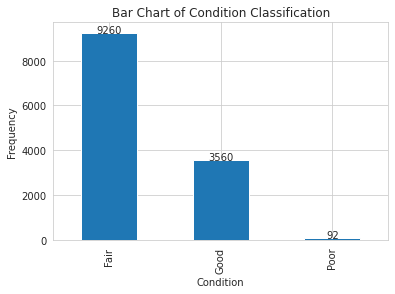

In [297]:
# count the frequency of each category in the column
category_counts = popu['Condition'].value_counts()

# create a bar chart of the category counts
category_counts.plot.bar()

# create a bar chart of the category counts
ax = category_counts.plot.bar()

# set the title and labels for the plot
plt.title('Bar Chart of Condition Classification')
plt.xlabel('Condition')
plt.ylabel('Frequency')

# add text labels for the counts on each bar
for i, v in enumerate(category_counts.values):
    ax.text(i, v + 0.2, str(v), ha='center')

# show the plot
plt.show()

In [298]:

# export the dataframe to a CSV file
popu.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/230318_Prediction.csv', index=False)